
 Dataset Loaded Successfully!

   Sensor1_Temp  Sensor1_Pressure  Sensor1_Humidity  Sensor2_Temp  \
0         33.97          909.5364             78.81         33.96   
1         33.96          909.5364             78.81         33.95   
2         33.95          909.5324             78.99         33.94   
3         33.95          909.5289             79.12         33.94   
4         33.95          909.5289             79.18         33.94   

   Sensor2_Pressure  Sensor2_Humidity  
0          909.4451             87.90  
1          909.4553             87.90  
2          909.4709             87.99  
3          909.4604             88.01  
4          909.4604             88.01  


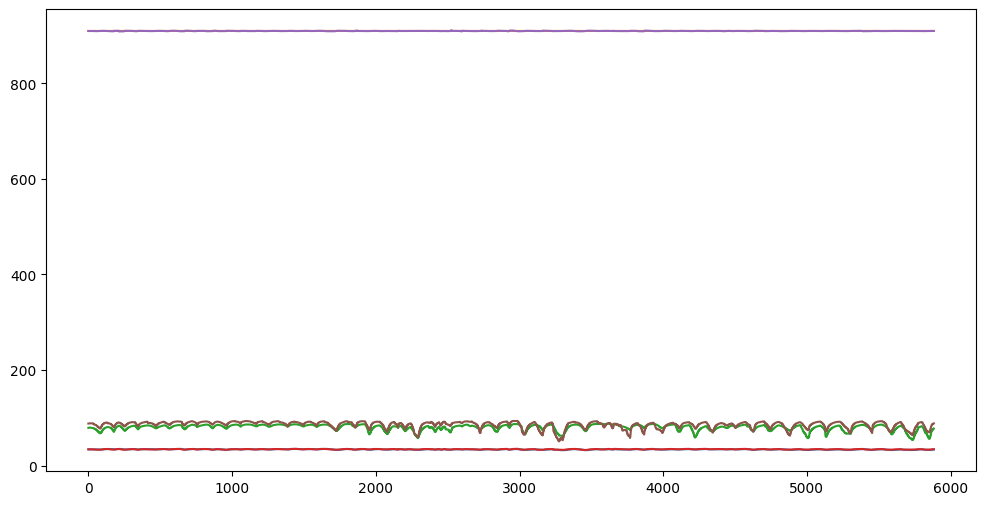

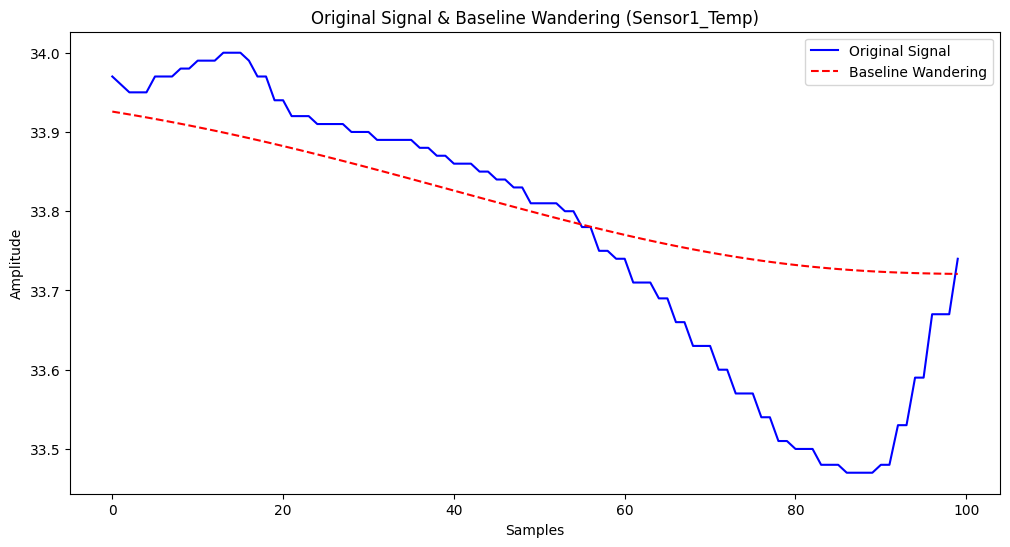

Baseline Wandering plotted for the first 100 samples.


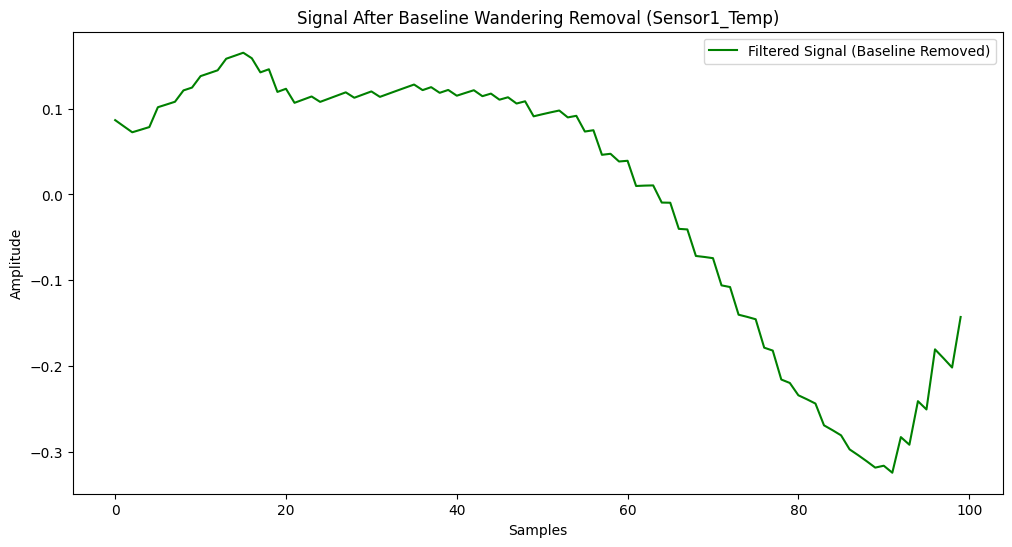

Baseline Wandering removed and cleaned signal plotted.


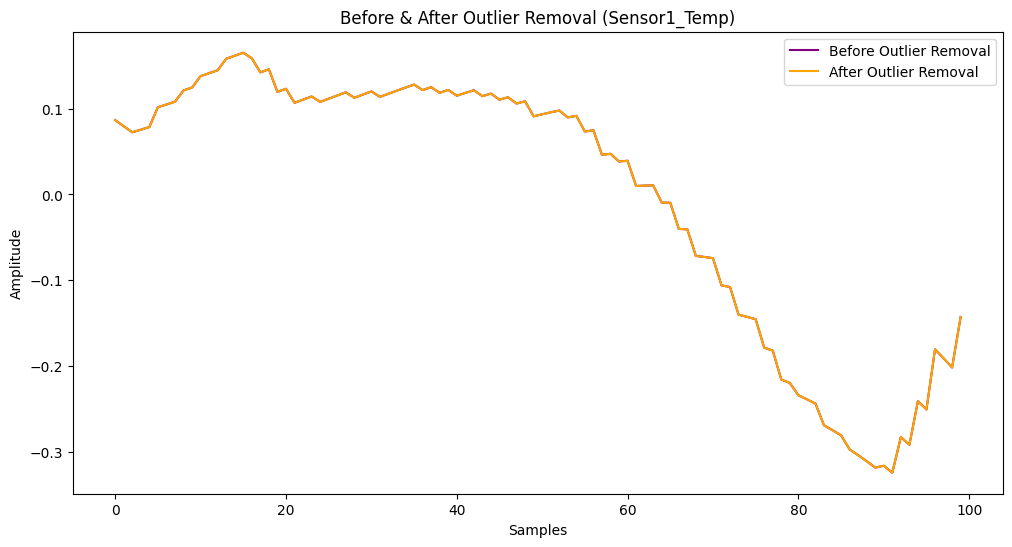

Outliers removed and cleaned signal plotted.


In [2]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

# Function to select file
def load_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset",
                                           filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
    return file_path

# Function to detect baseline wandering using a high-pass filter
def detect_baseline_wandering(data, fs=100, cutoff=0.5):
    
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='high', analog=False)
    
    baseline_wandering_detected = False
    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # Ensure it's numerical
            filtered_signal = filtfilt(b, a, data[col].fillna(0))  # Apply filter
            drift = np.mean(np.abs(data[col] - filtered_signal))  # Compute deviation
            
            if drift > 0.05 * np.max(data[col]):  # Threshold for wandering
                print(f"Baseline Wandering Detected in column: {col}")
                baseline_wandering_detected = True

    if not baseline_wandering_detected:
        print(" No significant Baseline Wandering detected.")
        
def extract_baseline_wandering(signal, fs=100, cutoff=0.5):
    """
    Extracts baseline wandering using a low-pass Butterworth filter.
    - fs: Sampling frequency (assumed)
    - cutoff: Cutoff frequency for baseline wandering (default 0.5 Hz)
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    baseline_wander = filtfilt(b, a, signal)
    return baseline_wander
    
def remove_baseline_wandering(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='high', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal
    
def remove_outliers(signal, threshold=3):
    z_scores = zscore(signal)
    filtered_signal = np.where(np.abs(z_scores) > threshold, np.median(signal), signal)
    return filtered_signal
    
# Load dataset
file_path = load_file()
if file_path:
    # Read the file
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    print("\n Dataset Loaded Successfully!\n")
    print(df.head())  # Display first few rows

    # Plot all columns
    plt.figure(figsize=(12, 6))
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):  # Plot only numeric columns
            plt.plot(df[col], label=col)
            numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    
    if not numeric_columns:
        print("No numeric columns found in the dataset.")
    else:
        signal_column = numeric_columns[0]  # Take the first numeric column
        signal = df[signal_column].fillna(0)[:100]  # Take first 100 samples

        # Extract baseline wandering
        baseline_wandering = extract_baseline_wandering(signal)
        filtered_signal = remove_baseline_wandering(signal)
        #outliner removal
        outlier_removed_signal = remove_outliers(filtered_signal)


        # Plot the original signal and baseline wandering
        plt.figure(figsize=(12, 6))
        plt.plot(signal, label="Original Signal", color='b')
        plt.plot(baseline_wandering, label="Baseline Wandering", color='r', linestyle='dashed')
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.title(f"Original Signal & Baseline Wandering ({signal_column})")
        plt.legend()
        plt.show()
        print("Baseline Wandering plotted for the first 100 samples.")

        plt.figure(figsize=(12, 6))
        plt.plot(filtered_signal, label="Filtered Signal (Baseline Removed)", color='g')
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.title(f"Signal After Baseline Wandering Removal ({signal_column})")
        plt.legend()
        plt.show()
        print("Baseline Wandering removed and cleaned signal plotted.")

        plt.figure(figsize=(12, 6))
        plt.plot(filtered_signal, label="Before Outlier Removal", color='purple')
        plt.plot(outlier_removed_signal, label="After Outlier Removal", color='orange')
        plt.xlabel("Samples")
        plt.ylabel("Amplitude")
        plt.title(f"Before & After Outlier Removal ({signal_column})")
        plt.legend()
        plt.show()

        print("Outliers removed and cleaned signal plotted.")
        
else:
    print("No file selected. Please upload a valid dataset.")
    plt.xlabel("Time (samples)")
    plt.ylabel("Signal Amplitude")
    plt.title("Original Signal of Dataset")
    plt.legend()
    plt.show()

    # Detect baseline wandering
    detect_baseline_wandering(df)



In [ ]:
!pip install pandas numpy matplotlib scipy openpyxl


In [17]:
from scipy.stats import zscore


In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore

# Function to select file
def load_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Select a dataset",
                                           filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
    return file_path

# Function to design a Butterworth high-pass filter for baseline wandering removal
def high_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Function to design a Butterworth low-pass filter to extract baseline wandering
def low_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Function to remove outliers using Z-score method
def remove_outliers(signal, threshold=3):
    z_scores = zscore(signal)
    filtered_signal = np.where(np.abs(z_scores) > threshold, np.median(signal), signal)
    return filtered_signal

# Load dataset
file_path = load_file()
if file_path:
    # Read the file
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    print("\n Dataset Loaded Successfully!\n")
    print(df.head())  # Display first few rows

    # Select only numeric columns
    numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

    if not numeric_columns:
        print("No numeric columns found in the dataset.")
    else:
        plt.figure(figsize=(12, 6))
        for col in numeric_columns:
            signal = df[col].fillna(0)[:100]  # Take first 100 samples
            
            # Extract and remove baseline wandering
            baseline_wandering = low_pass_filter(signal)
            filtered_signal = high_pass_filter(signal)
            
            # Remove outliers
            outlier_removed_signal = remove_outliers(filtered_signal)

            # Plot original signal and baseline wandering
            plt.figure(figsize=(12, 6))
            plt.plot(signal, label="Original Signal", color='b')
            plt.plot(baseline_wandering, label="Baseline Wandering", color='r', linestyle='dashed')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Original Signal & Baseline Wandering ({col})")
            plt.legend()
            plt.show()
            print(f"Baseline Wandering plotted for {col}.")

            # Plot signal after baseline wandering removal
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Filtered Signal (Baseline Removed)", color='g')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Signal After Baseline Wandering Removal ({col})")
            plt.legend()
            plt.show()
            print(f"Baseline Wandering removed and cleaned signal plotted for {col}.")

            # Plot before and after outlier removal
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Before Outlier Removal", color='purple')
            plt.plot(outlier_removed_signal, label="After Outlier Removal", color='orange')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Before & After Outlier Removal ({col})")
            plt.legend()
            plt.show()
            print(f"Outliers removed and cleaned signal plotted for {col}.")

else:
    print("No file selected. Please upload a valid dataset.")


In [20]:
!pip install tensorflow


In [21]:
pip install tensorflow numpy pandas matplotlib scikit-learn


Dataset Loaded Successfully!
   Sensor1_Temp  Sensor1_Pressure  Sensor1_Humidity  Sensor2_Temp  \
0         33.97          909.5364             78.81         33.96   
1         33.96          909.5364             78.81         33.95   
2         33.95          909.5324             78.99         33.94   
3         33.95          909.5289             79.12         33.94   
4         33.95          909.5289             79.18         33.94   

   Sensor2_Pressure  Sensor2_Humidity  
0          909.4451             87.90  
1          909.4553             87.90  
2          909.4709             87.99  
3          909.4604             88.01  
4          909.4604             88.01  


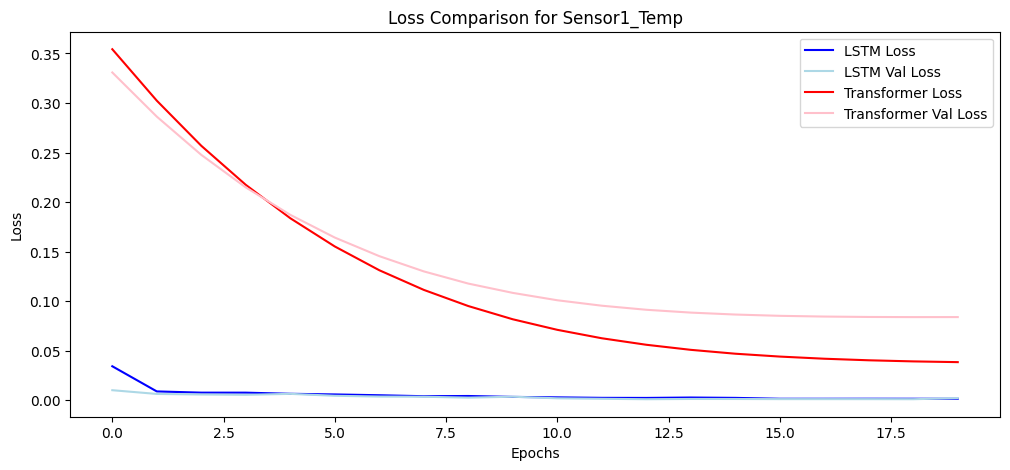

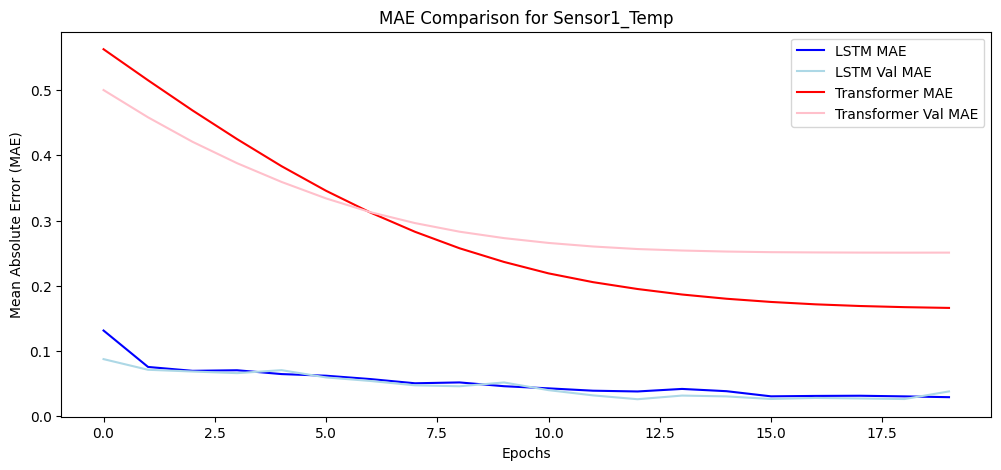

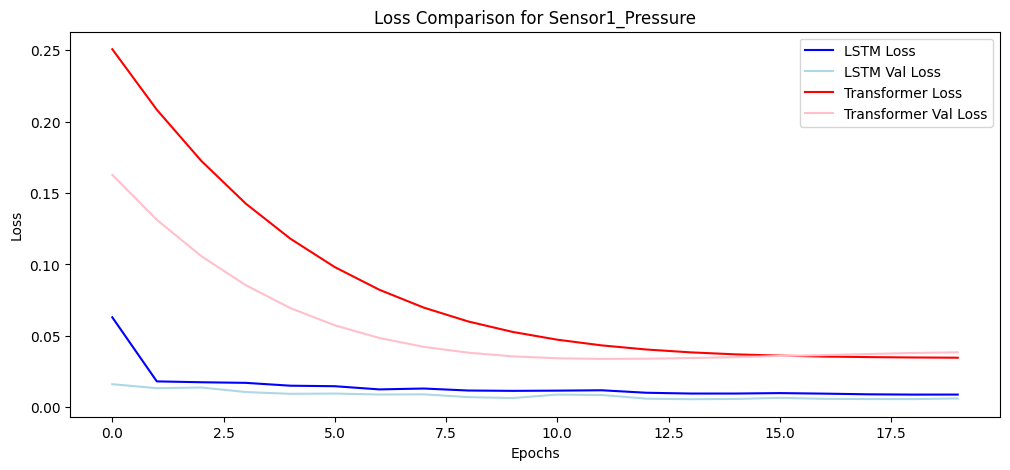

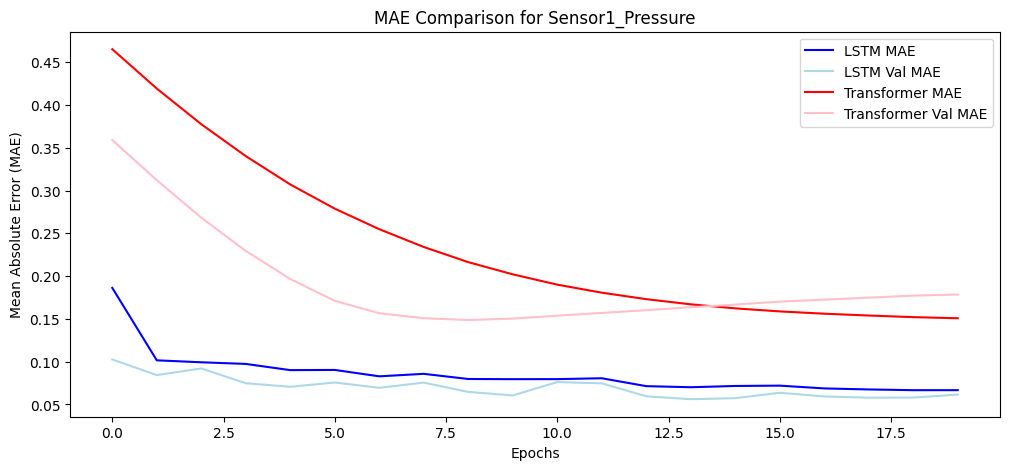

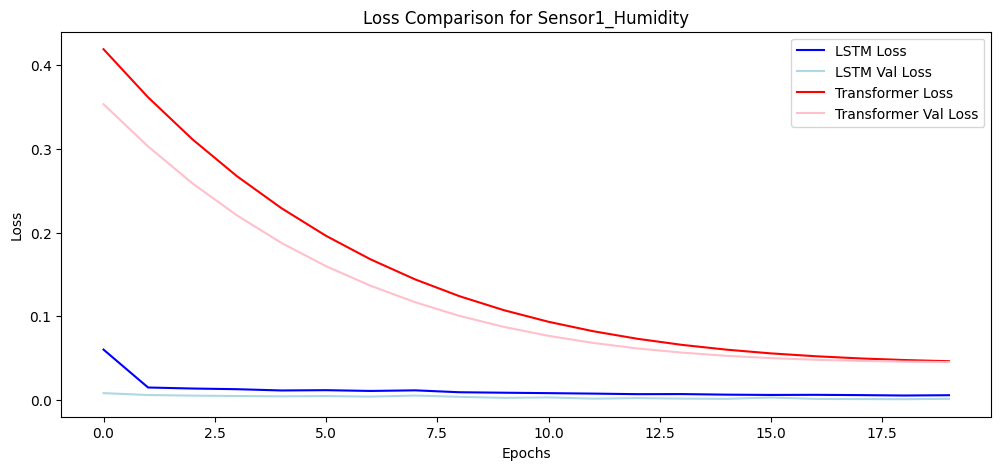

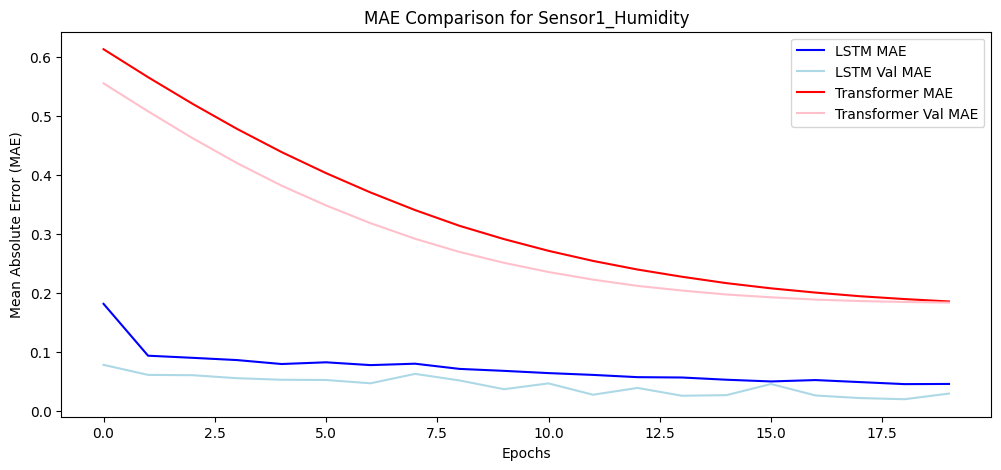

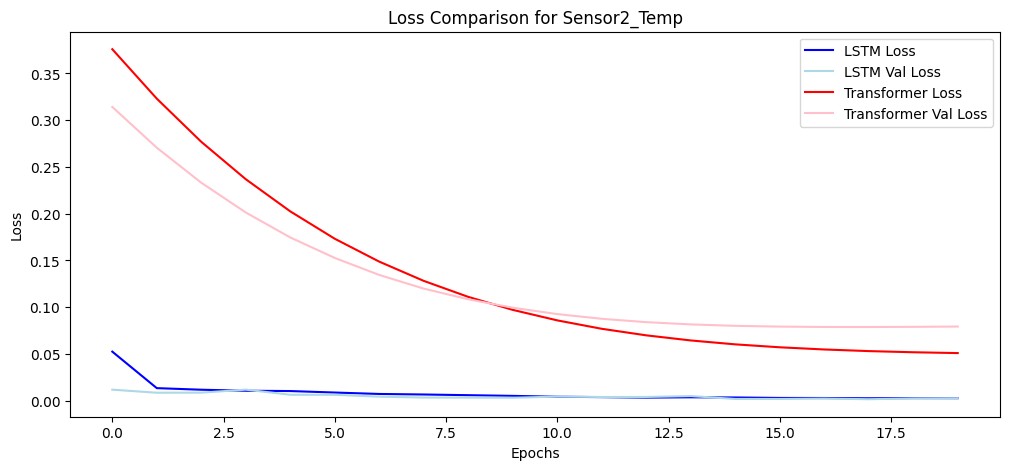

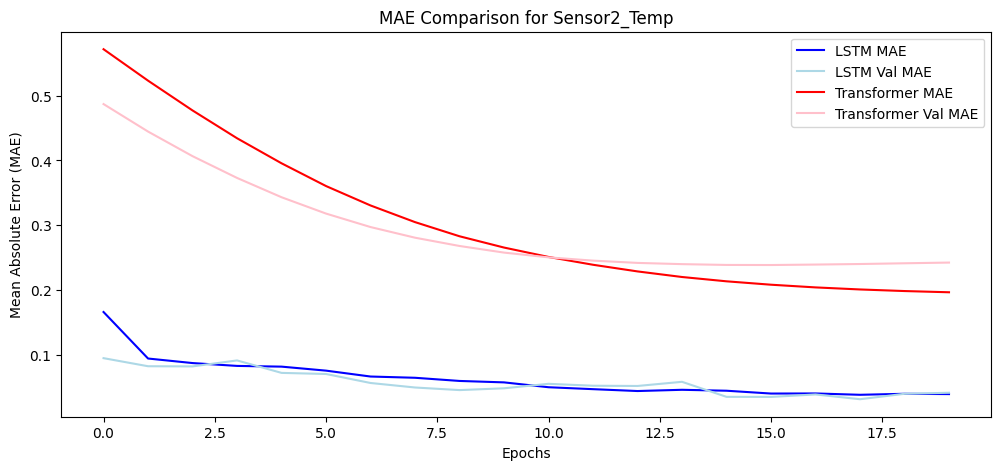

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to select file using Tkinter
def load_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select a dataset",
                                           filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
    return file_path

# Function to preprocess the signal
def butterworth_filter(signal, fs=300, cutoff=0.5, filter_type='high'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype=filter_type, analog=False)
    return filtfilt(b, a, signal)

def remove_baseline_wandering(signal):
    return butterworth_filter(signal, cutoff=0.5, filter_type='high')

def remove_outliers(signal, threshold=3):
    z_scores = zscore(signal)
    return np.where(np.abs(z_scores) > threshold, np.median(signal), signal)

# Function to build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Function to build Transformer model
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)
    
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Load dataset
file_path = load_file()
if file_path:
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    print("Dataset Loaded Successfully!")
    print(df.head())

    # Select numeric columns
    numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    if not numeric_columns:
        print("No numeric columns found in dataset.")
    else:
        # Process each column
        for col in numeric_columns:
            signal = df[col].fillna(0).values[:1000]  # Take first 1000 samples
            baseline_removed = remove_baseline_wandering(signal)
            outlier_removed = remove_outliers(baseline_removed)

            # Normalize signal
            scaler = MinMaxScaler()
            signal_scaled = scaler.fit_transform(outlier_removed.reshape(-1, 1))

            # Prepare data for LSTM/Transformer
            X, y = [], []
            time_steps = 10
            for i in range(len(signal_scaled) - time_steps):
                X.append(signal_scaled[i:i+time_steps])
                y.append(signal_scaled[i+time_steps])
            X, y = np.array(X), np.array(y)

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

            # Build and train LSTM model
            lstm_model = build_lstm_model((time_steps, 1))
            history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=0)

            # Build and train Transformer model
            transformer_model = build_transformer_model((time_steps, 1))
            history_transformer = transformer_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test), verbose=0)

            # Plot loss
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
            plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='lightblue')
            plt.plot(history_transformer.history['loss'], label='Transformer Loss', color='red')
            plt.plot(history_transformer.history['val_loss'], label='Transformer Val Loss', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.title(f"Loss Comparison for {col}")
            plt.legend()
            plt.show()

            # Plot accuracy (MAE)
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['mae'], label='LSTM MAE', color='blue')
            plt.plot(history_lstm.history['val_mae'], label='LSTM Val MAE', color='lightblue')
            plt.plot(history_transformer.history['mae'], label='Transformer MAE', color='red')
            plt.plot(history_transformer.history['val_mae'], label='Transformer Val MAE', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Mean Absolute Error (MAE)")
            plt.title(f"MAE Comparison for {col}")
            plt.legend()
            plt.show()
else:
    print("No file selected.")



 Dataset Loaded Successfully!

   Sensor1_Temp  Sensor1_Pressure  Sensor1_Humidity  Sensor2_Temp  \
0         33.97          909.5364             78.81         33.96   
1         33.96          909.5364             78.81         33.95   
2         33.95          909.5324             78.99         33.94   
3         33.95          909.5289             79.12         33.94   
4         33.95          909.5289             79.18         33.94   

   Sensor2_Pressure  Sensor2_Humidity  
0          909.4451             87.90  
1          909.4553             87.90  
2          909.4709             87.99  
3          909.4604             88.01  
4          909.4604             88.01  


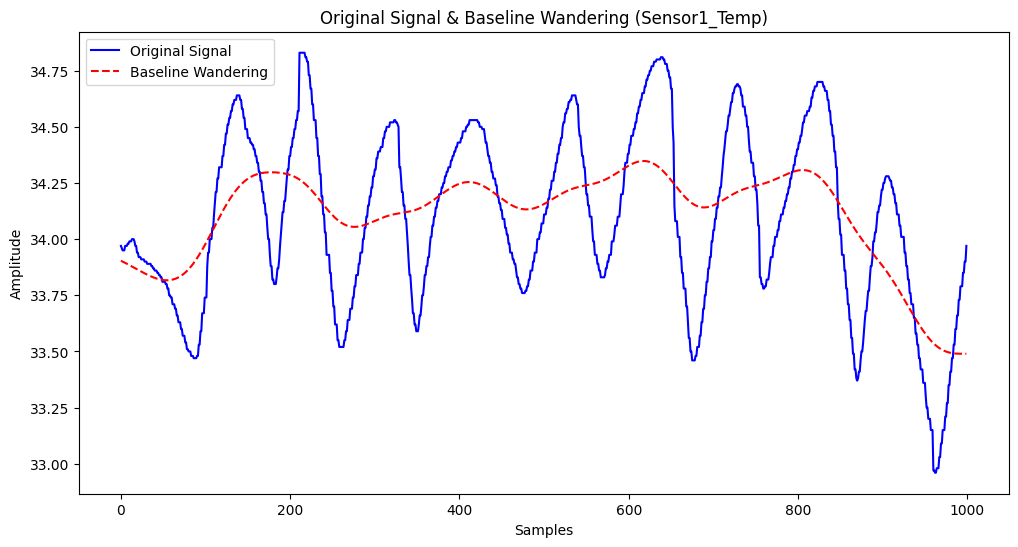

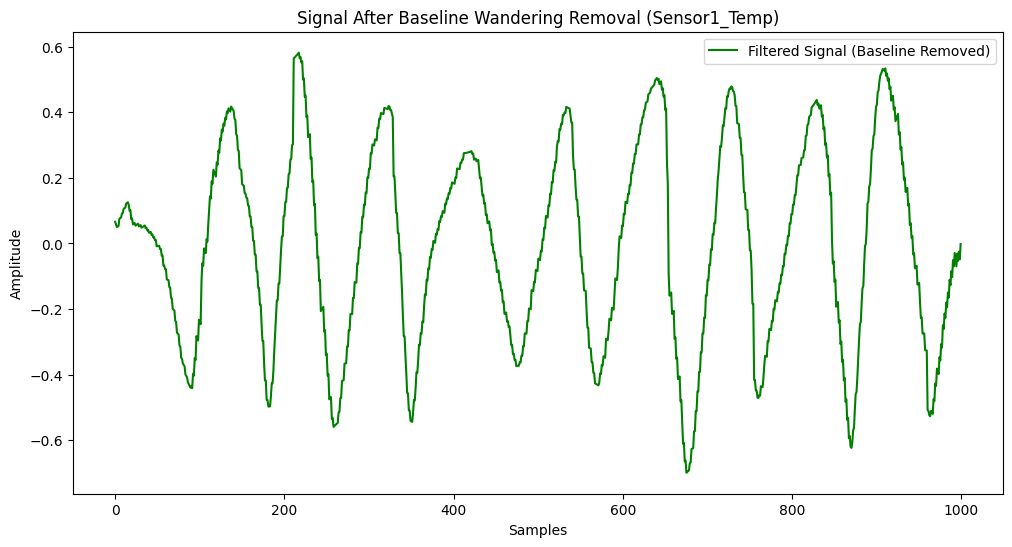

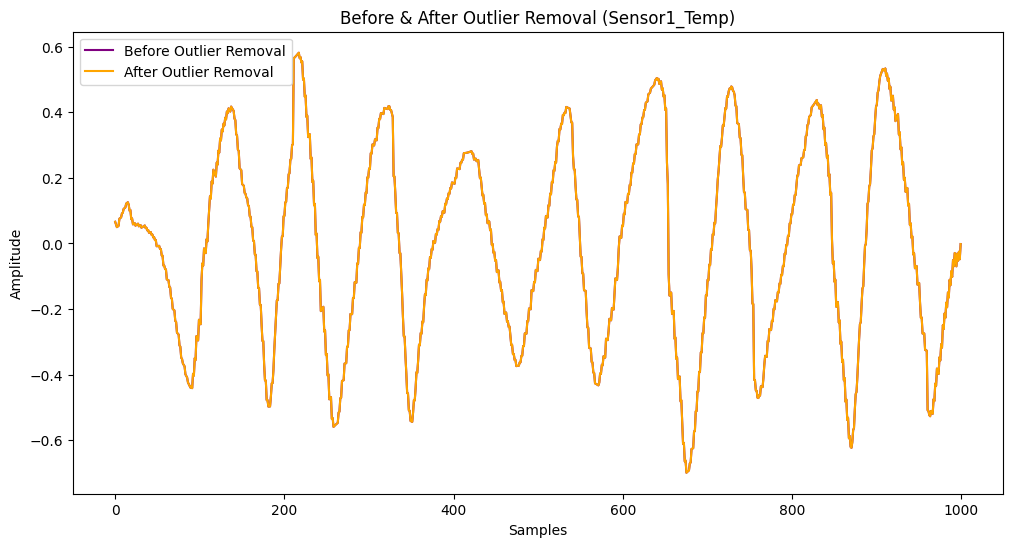

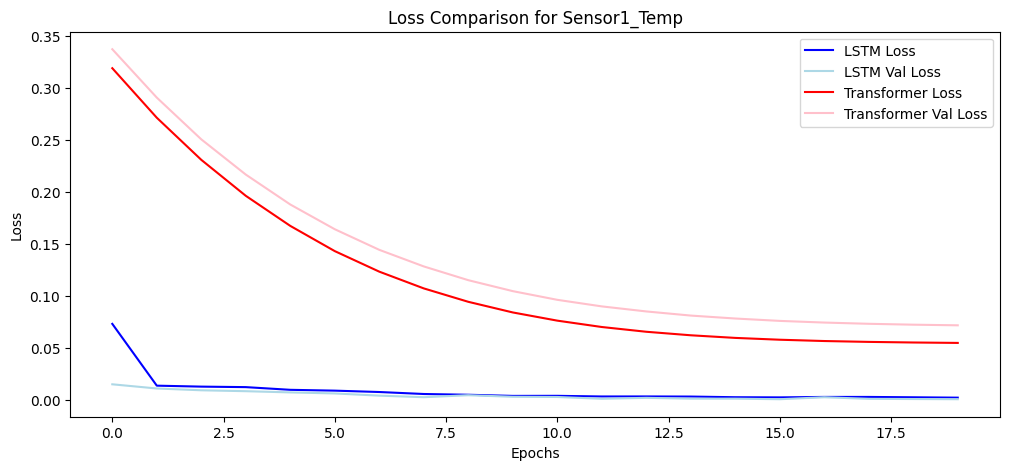

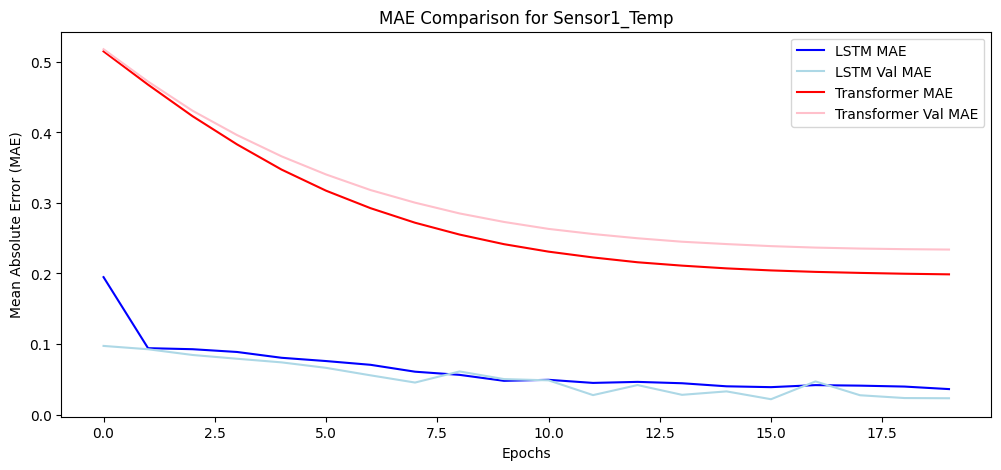

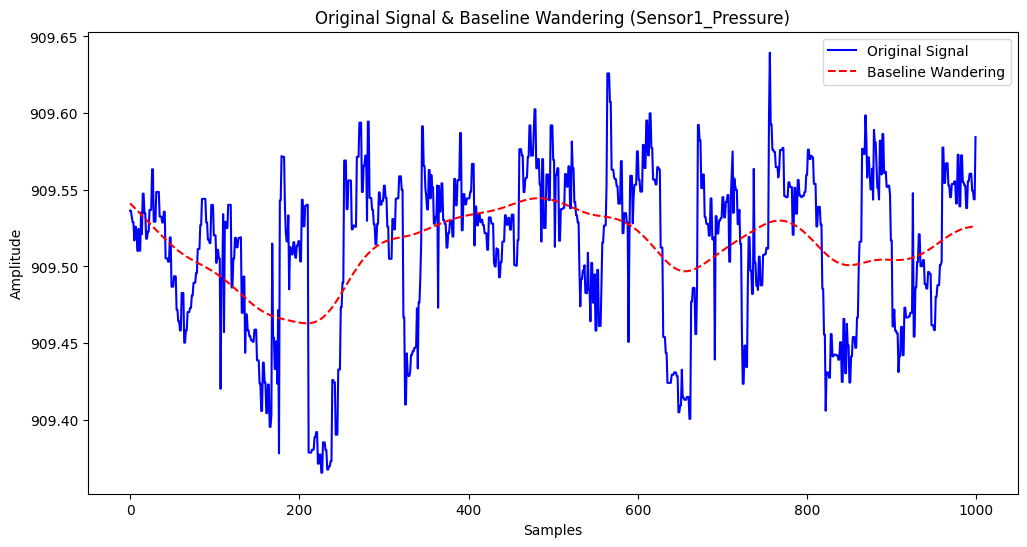

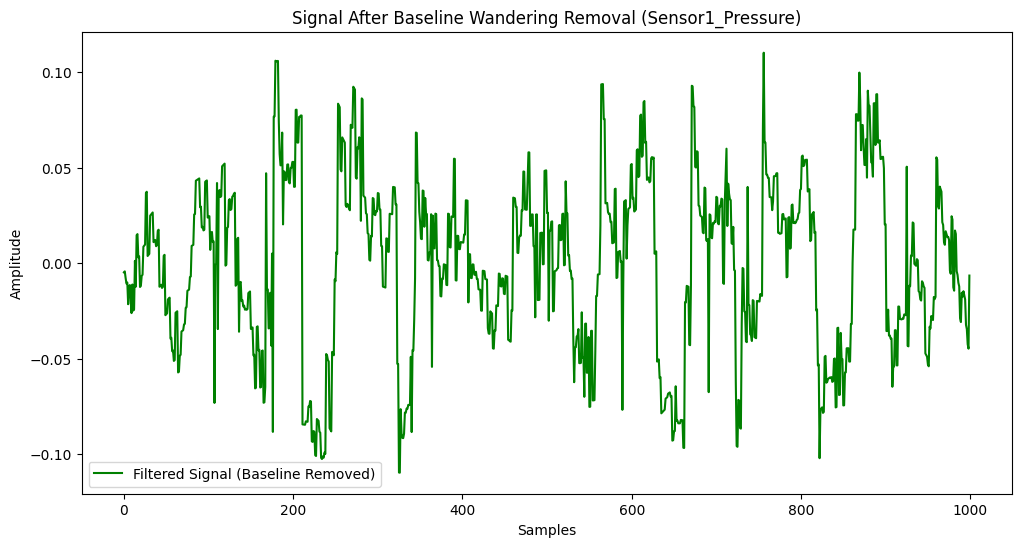

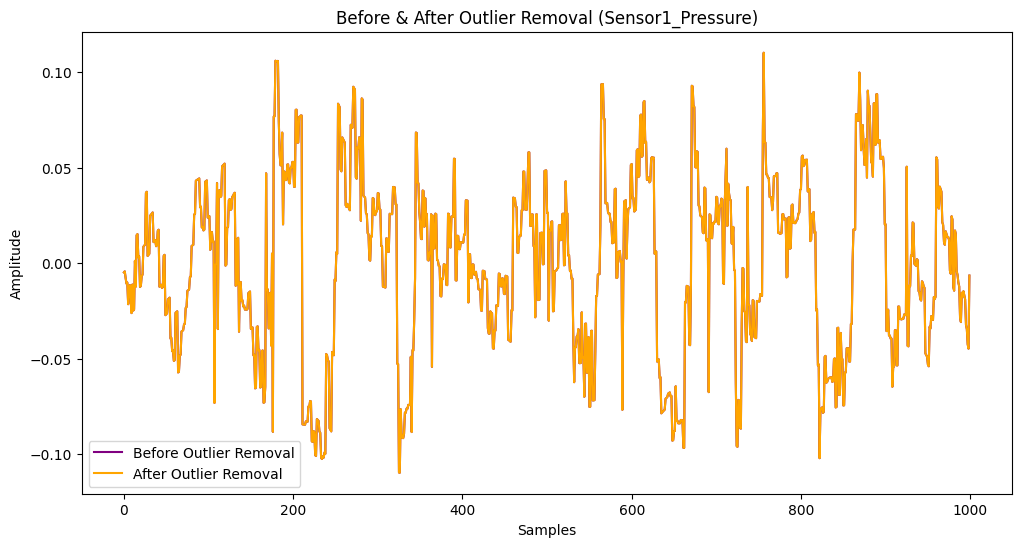

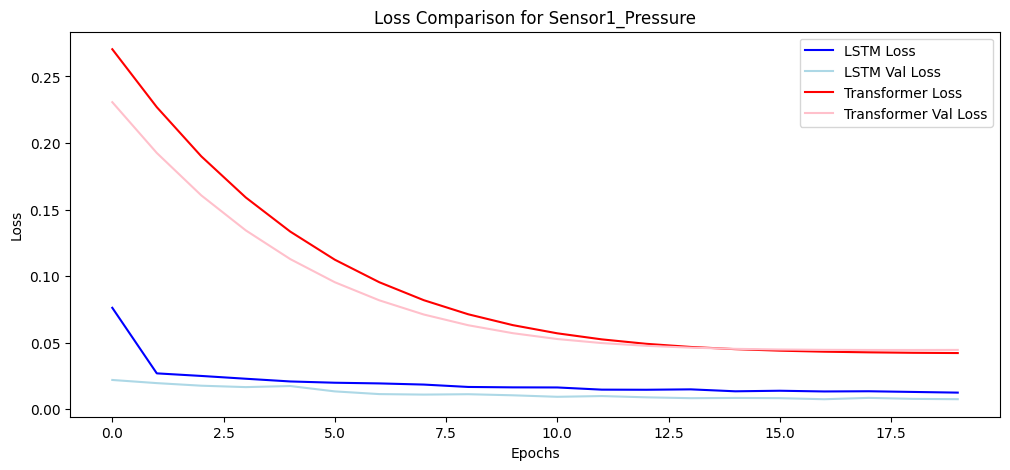

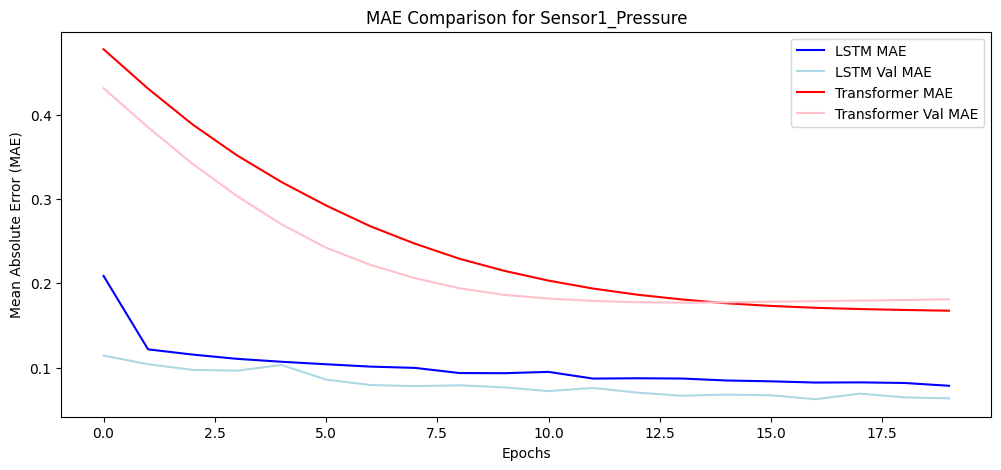

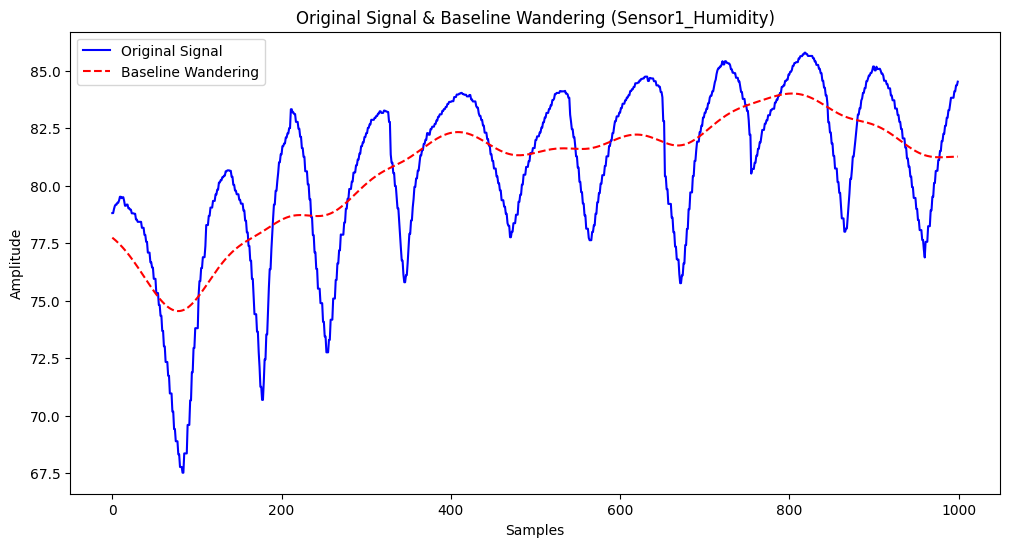

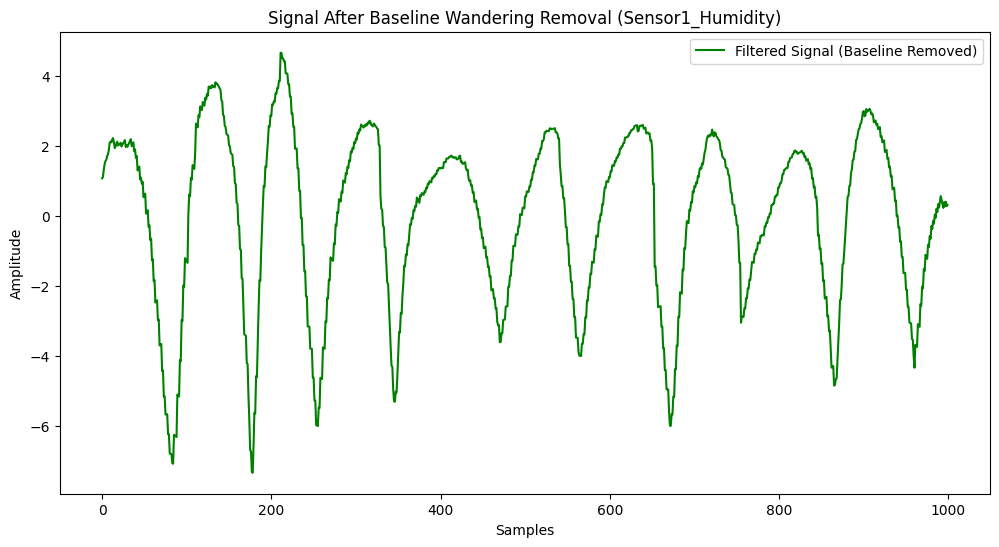

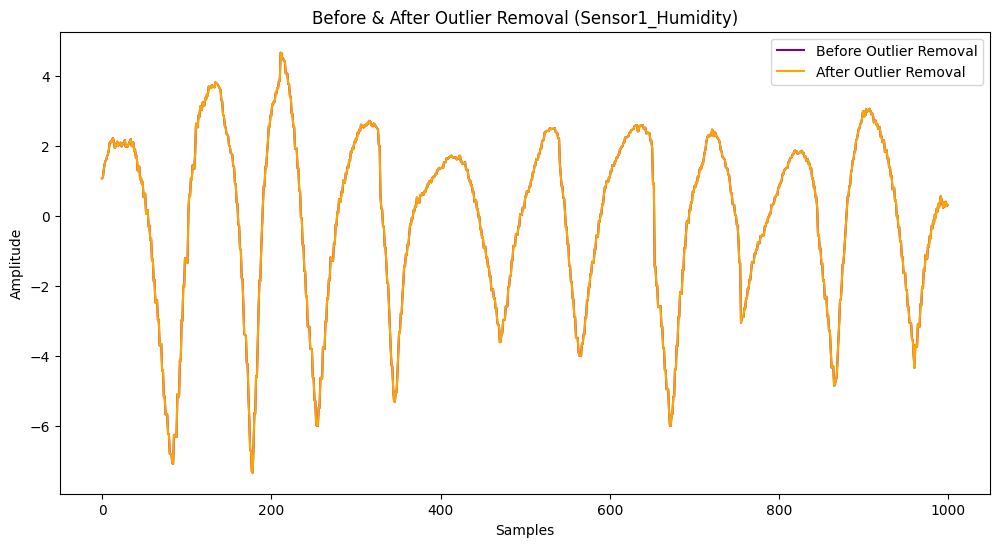

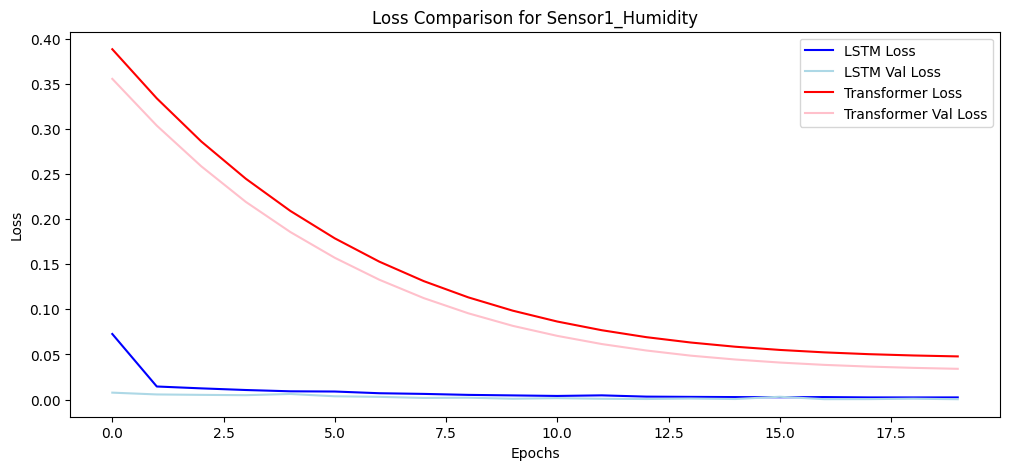

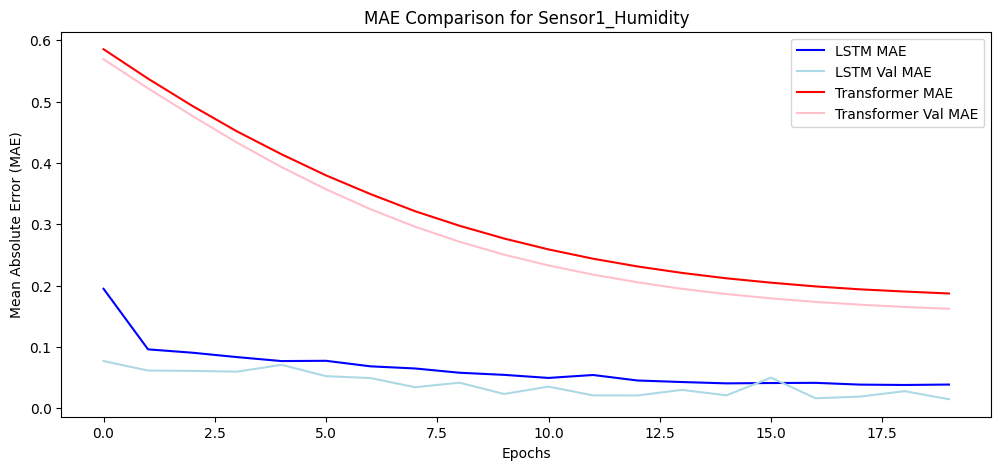

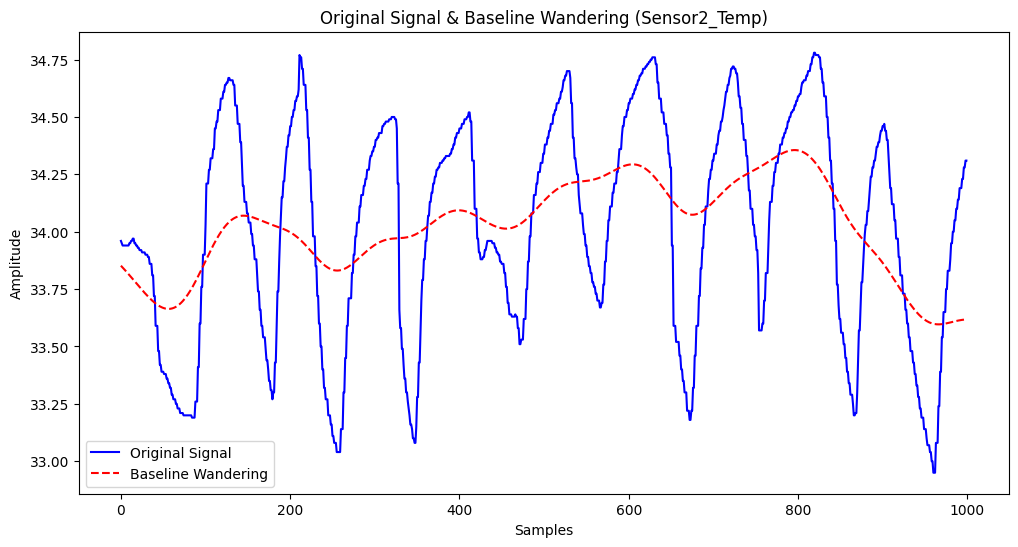

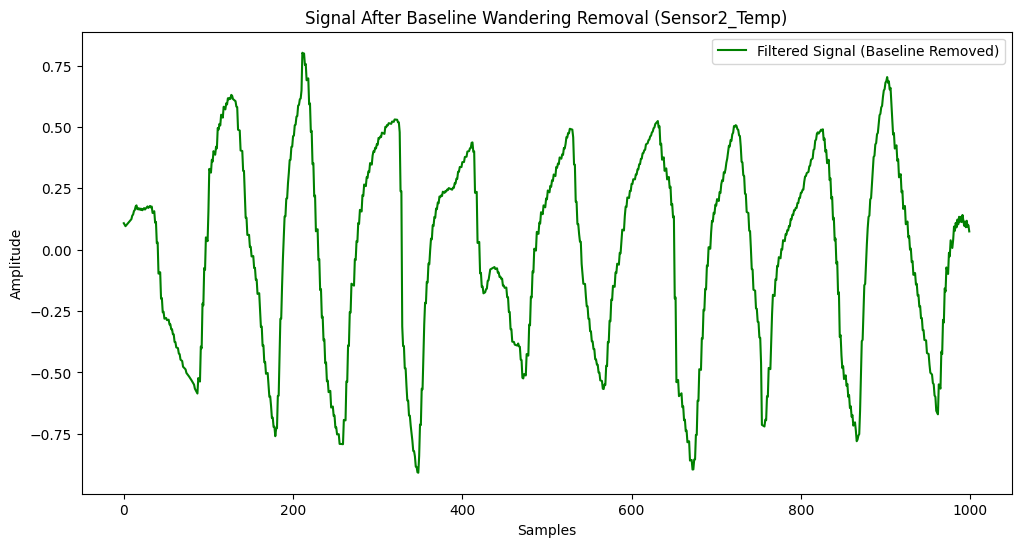

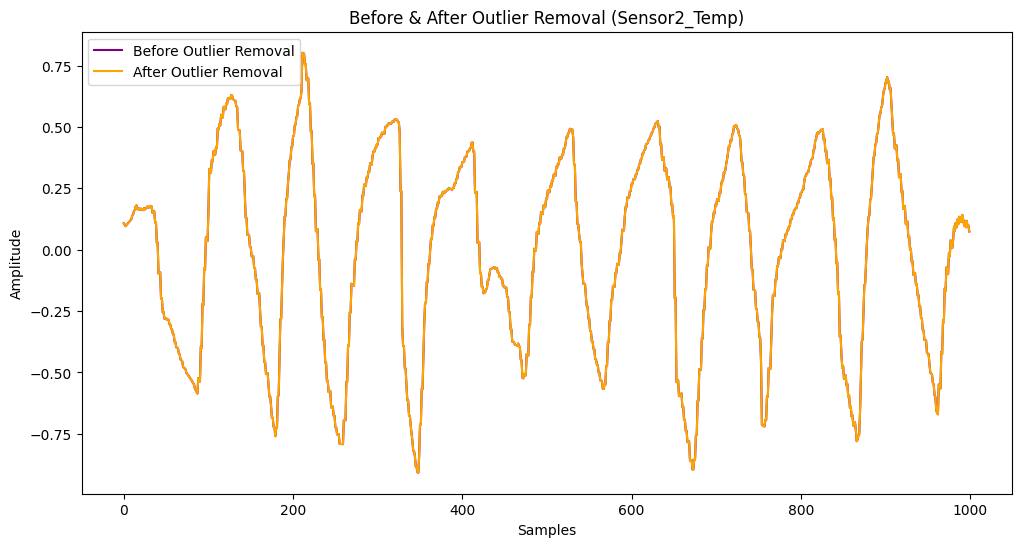

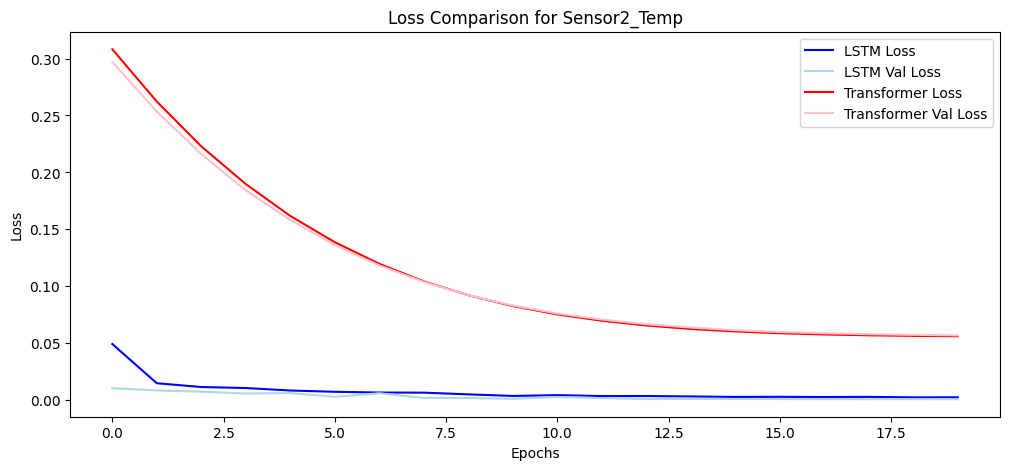

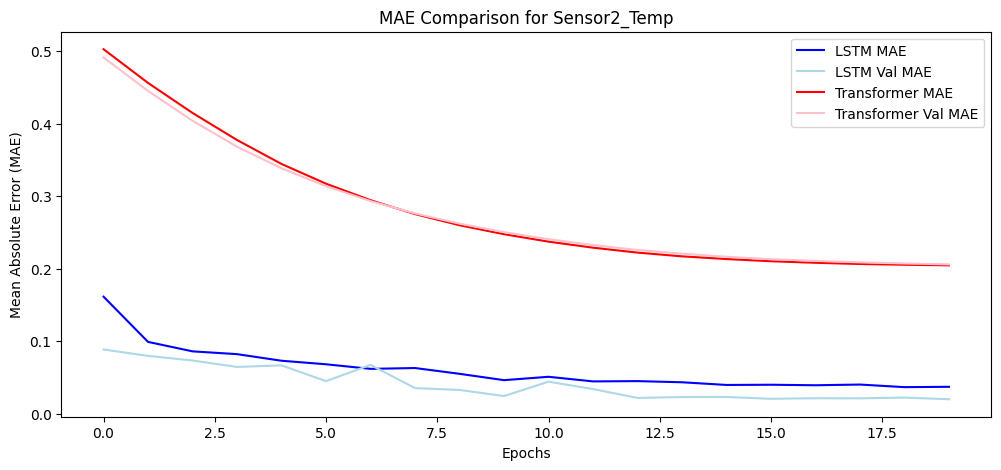

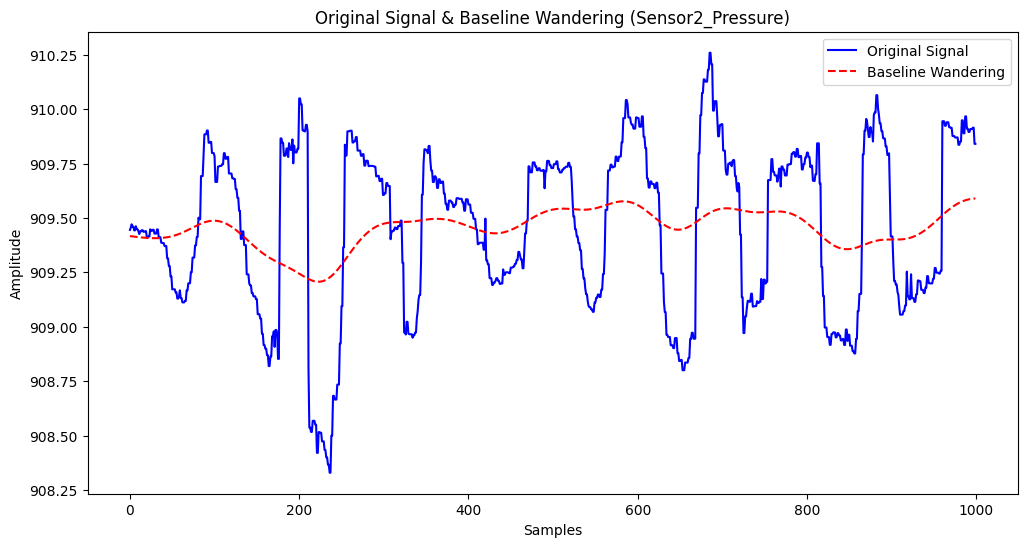

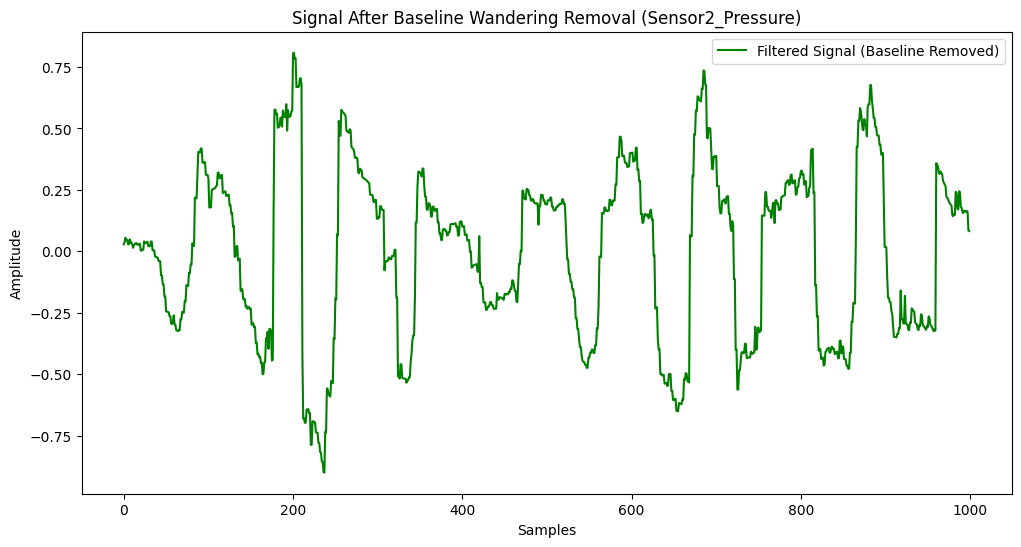

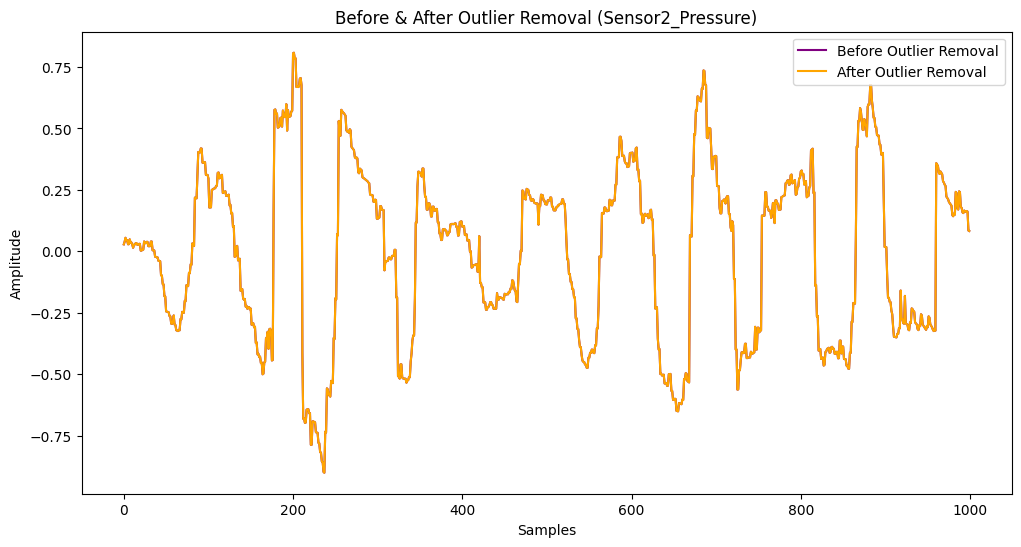

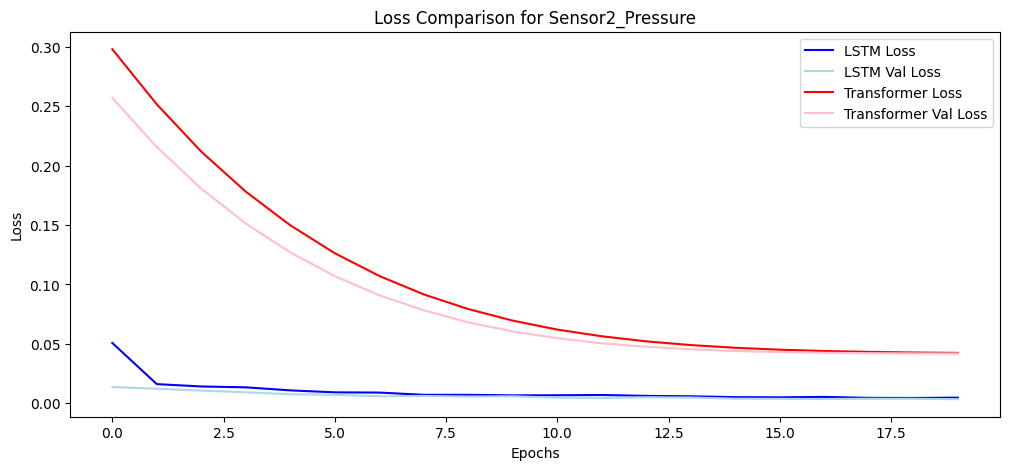

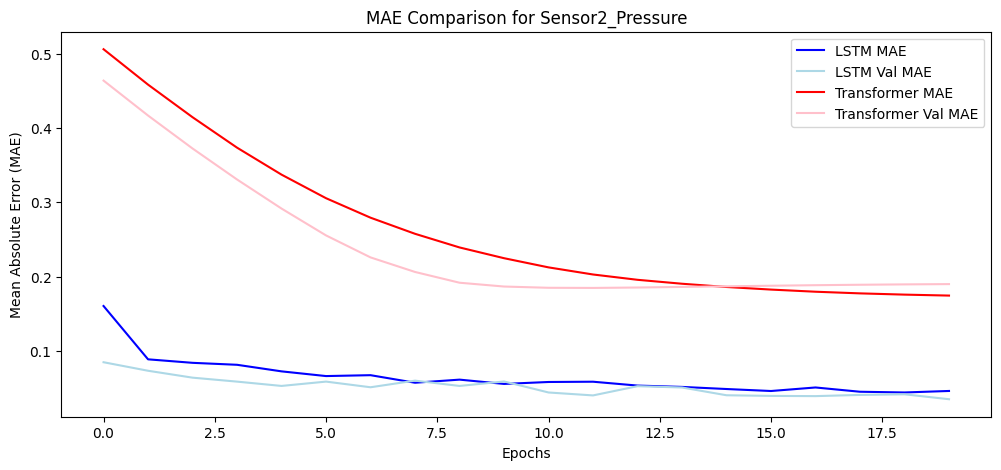

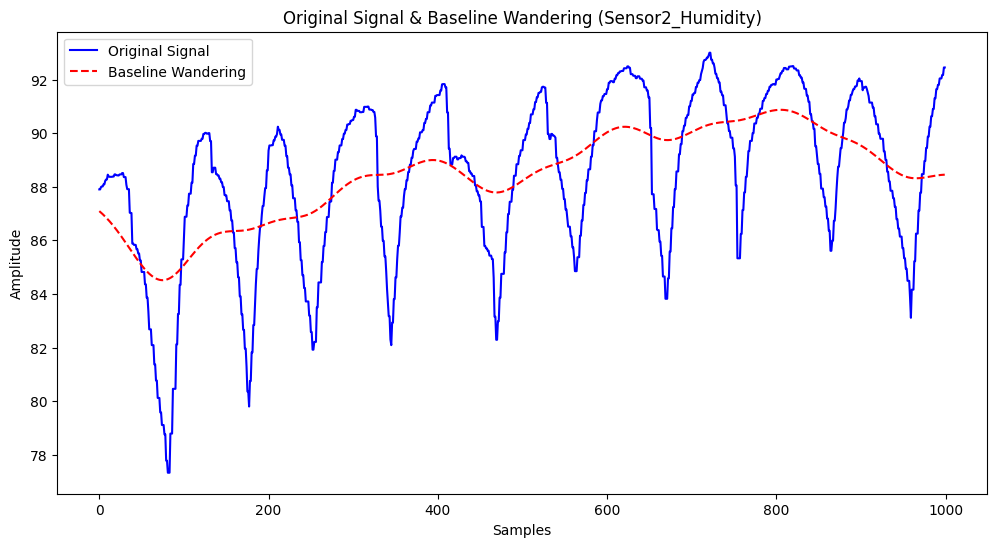

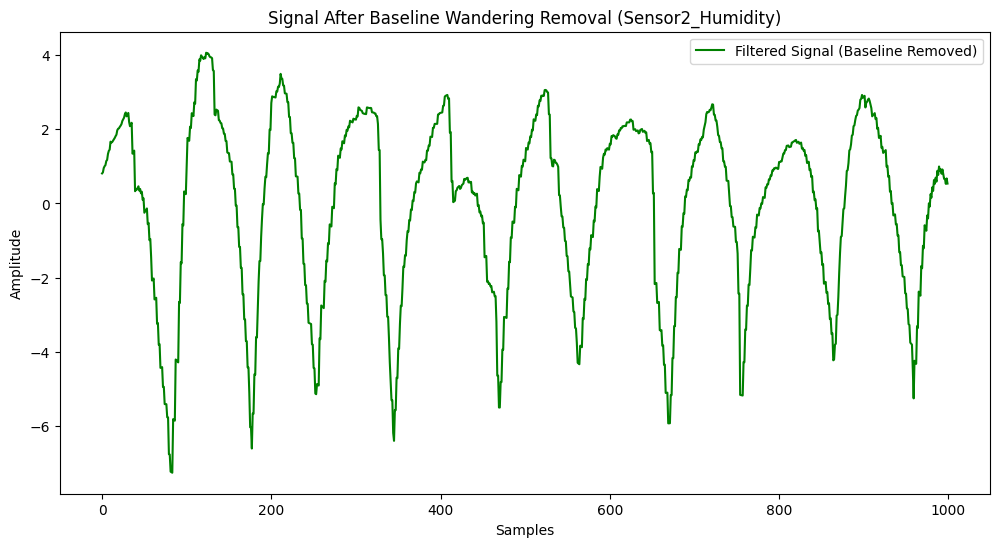

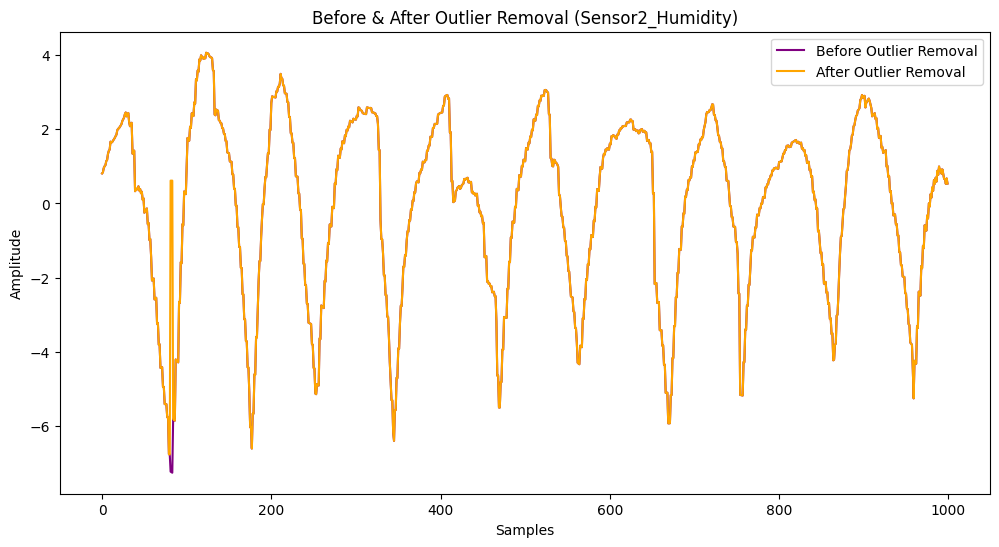

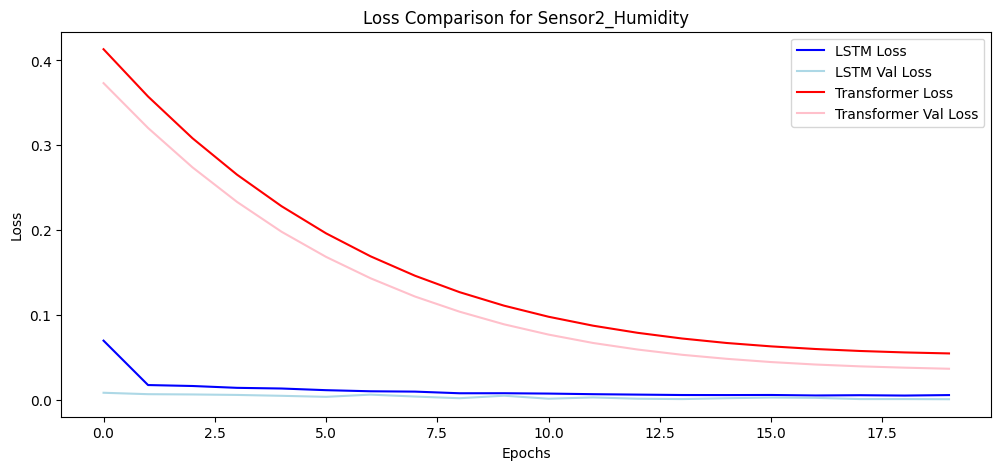

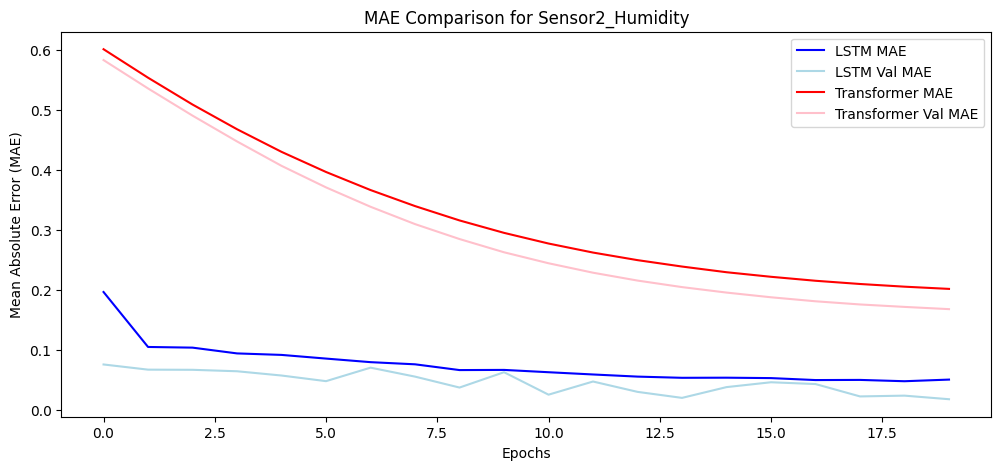

In [30]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to select file
def load_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select a dataset",
                                           filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
    return file_path

# Butterworth High-pass Filter (Baseline Wandering Removal)
def high_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Butterworth Low-pass Filter (Extract Baseline Wandering)
def low_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Remove Outliers using Z-score Method
def remove_outliers(signal, threshold=3):
    z_scores = zscore(signal)
    return np.where(np.abs(z_scores) > threshold, np.median(signal), signal)

# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Transformer Model
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Load dataset
file_path = load_file()
if file_path:
    # Read the file
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    print("\n Dataset Loaded Successfully!\n")
    print(df.head())

    # Select numeric columns
    numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    if not numeric_columns:
        print("No numeric columns found in dataset.")
    else:
        for col in numeric_columns:
            signal = df[col].fillna(0)[:1000]  # Take first 1000 samples

            # Extract and remove baseline wandering
            baseline_wandering = low_pass_filter(signal)
            filtered_signal = high_pass_filter(signal)

            # Remove outliers
            outlier_removed_signal = remove_outliers(filtered_signal)

            # Normalize signal
            scaler = MinMaxScaler()
            signal_scaled = scaler.fit_transform(outlier_removed_signal.reshape(-1, 1))

            # Prepare data for LSTM/Transformer
            X, y = [], []
            time_steps = 10
            for i in range(len(signal_scaled) - time_steps):
                X.append(signal_scaled[i:i + time_steps])
                y.append(signal_scaled[i + time_steps])
            X, y = np.array(X), np.array(y)

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

            # Build and Train LSTM Model
            lstm_model = build_lstm_model((time_steps, 1))
            history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16,
                                          validation_data=(X_test, y_test), verbose=0)

            # Build and Train Transformer Model
            transformer_model = build_transformer_model((time_steps, 1))
            history_transformer = transformer_model.fit(X_train, y_train, epochs=20, batch_size=16,
                                                        validation_data=(X_test, y_test), verbose=0)

            # Plot Original Signal & Baseline Wandering
            plt.figure(figsize=(12, 6))
            plt.plot(signal, label="Original Signal", color='b')
            plt.plot(baseline_wandering, label="Baseline Wandering", color='r', linestyle='dashed')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Original Signal & Baseline Wandering ({col})")
            plt.legend()
            plt.show()

            # Plot Filtered Signal (Baseline Wandering Removed)
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Filtered Signal (Baseline Removed)", color='g')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Signal After Baseline Wandering Removal ({col})")
            plt.legend()
            plt.show()

            # Plot Before & After Outlier Removal
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Before Outlier Removal", color='purple')
            plt.plot(outlier_removed_signal, label="After Outlier Removal", color='orange')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Before & After Outlier Removal ({col})")
            plt.legend()
            plt.show()

            # Plot Loss Comparison (LSTM vs Transformer)
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
            plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='lightblue')
            plt.plot(history_transformer.history['loss'], label='Transformer Loss', color='red')
            plt.plot(history_transformer.history['val_loss'], label='Transformer Val Loss', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.title(f"Loss Comparison for {col}")
            plt.legend()
            plt.show()

            # Plot MAE Comparison (LSTM vs Transformer)
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['mae'], label='LSTM MAE', color='blue')
            plt.plot(history_lstm.history['val_mae'], label='LSTM Val MAE', color='lightblue')
            plt.plot(history_transformer.history['mae'], label='Transformer MAE', color='red')
            plt.plot(history_transformer.history['val_mae'], label='Transformer Val MAE', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Mean Absolute Error (MAE)")
            plt.title(f"MAE Comparison for {col}")
            plt.legend()
            plt.show()

else:
    print("No file selected. Please upload a valid dataset.")



 Dataset Loaded Successfully!

   Sensor1_Temp  Sensor1_Pressure  Sensor1_Humidity  Sensor2_Temp  \
0         34.47          912.3981             76.54         34.08   
1         34.48          912.3674             76.64         34.08   
2         34.48          912.2913             76.51         34.09   
3         34.48          912.2913             76.51         34.09   
4         34.48          912.2913             76.51         34.08   

   Sensor2_Pressure  Sensor2_Humidity  
0          911.6891             75.70  
1          911.6891             75.70  
2          911.6050             75.52  
3          911.6050             74.33  
4          911.5980             74.33  


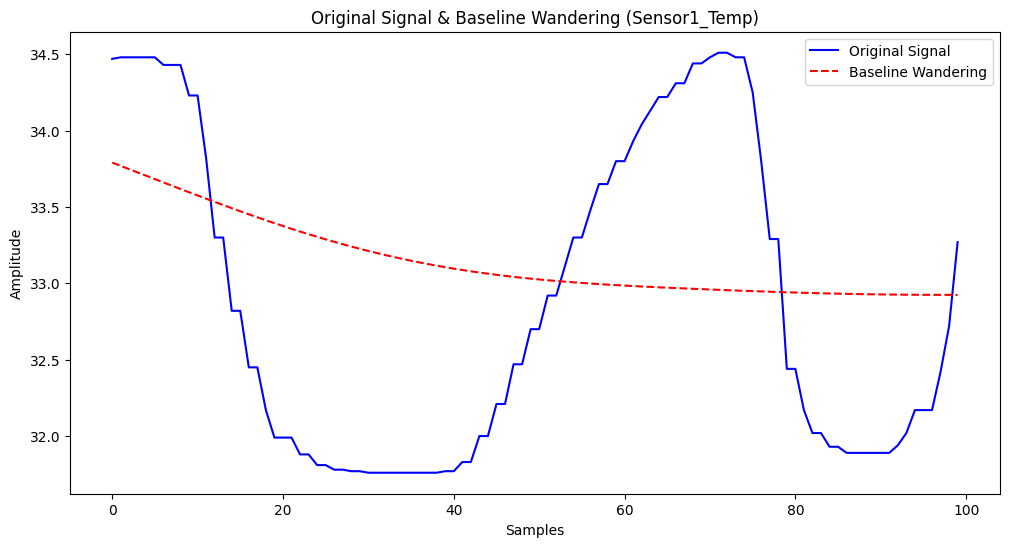

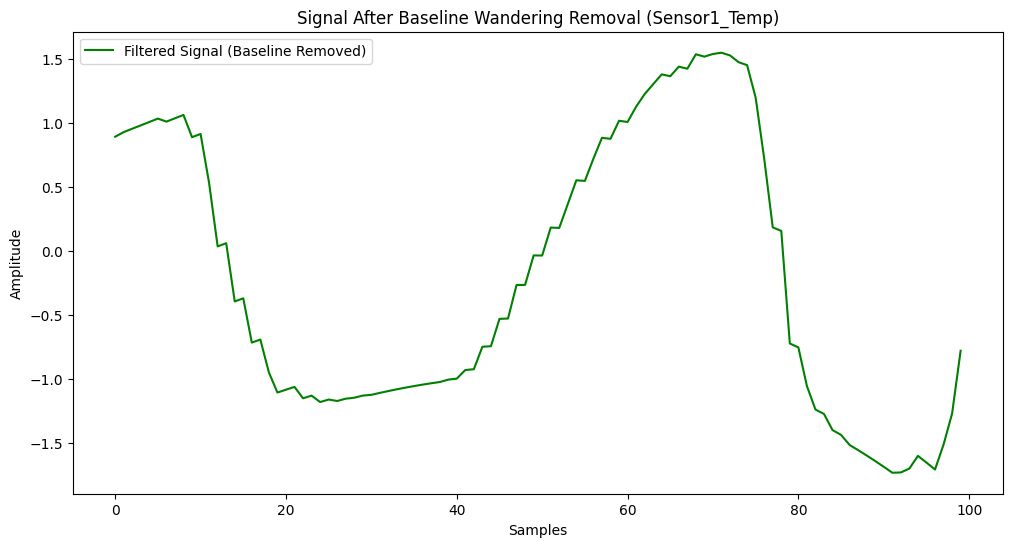

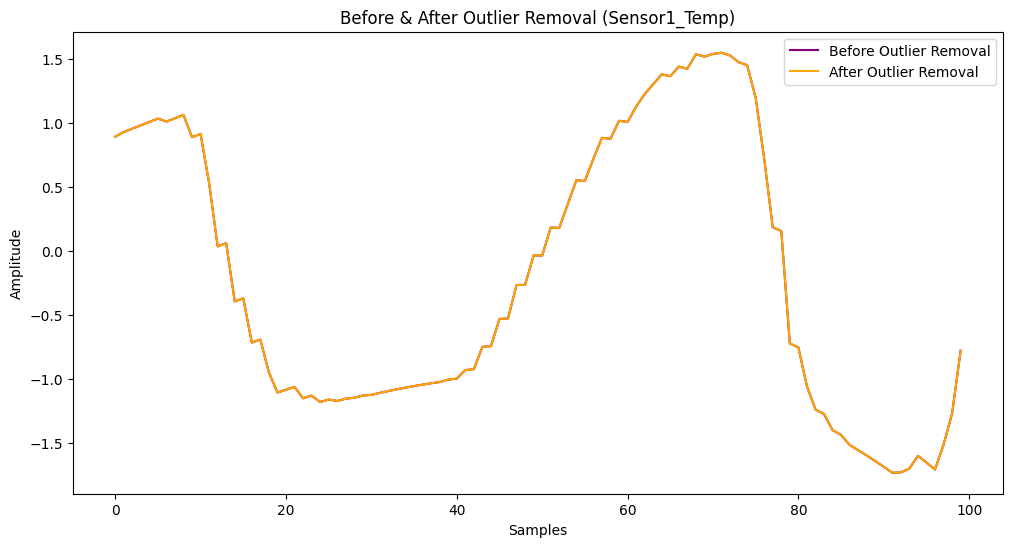

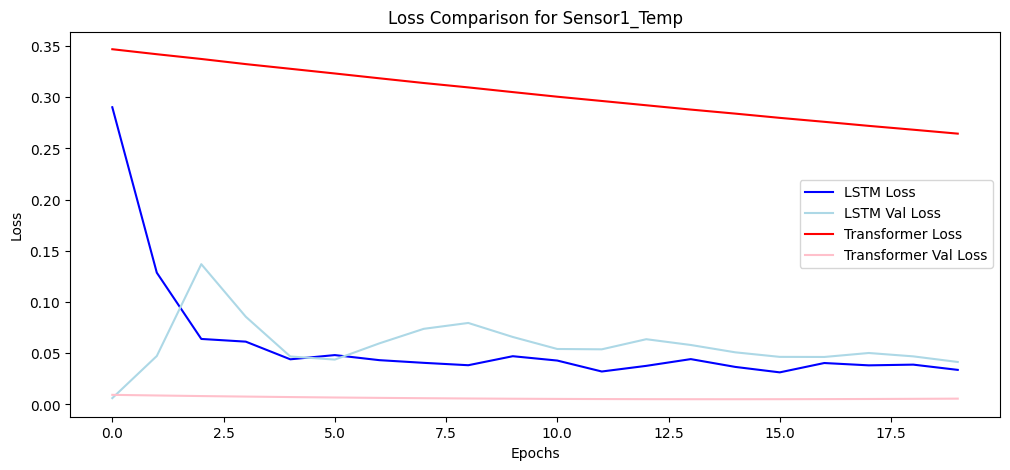

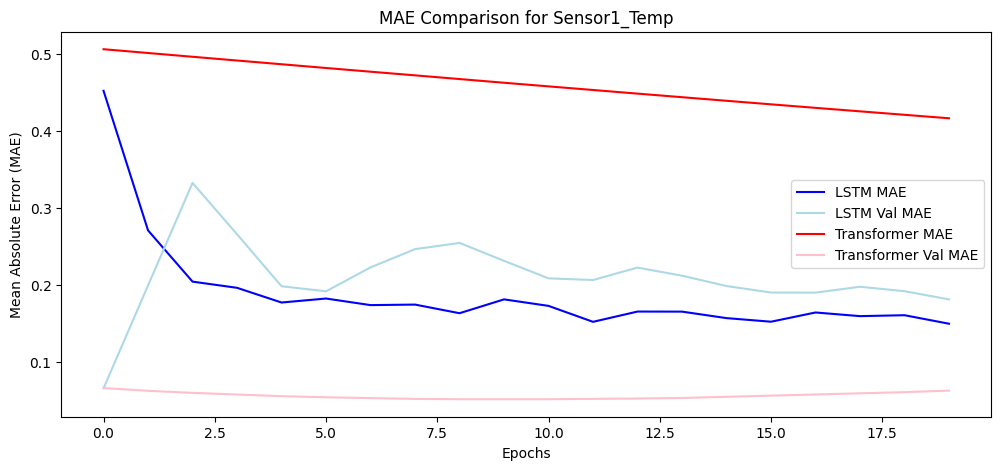

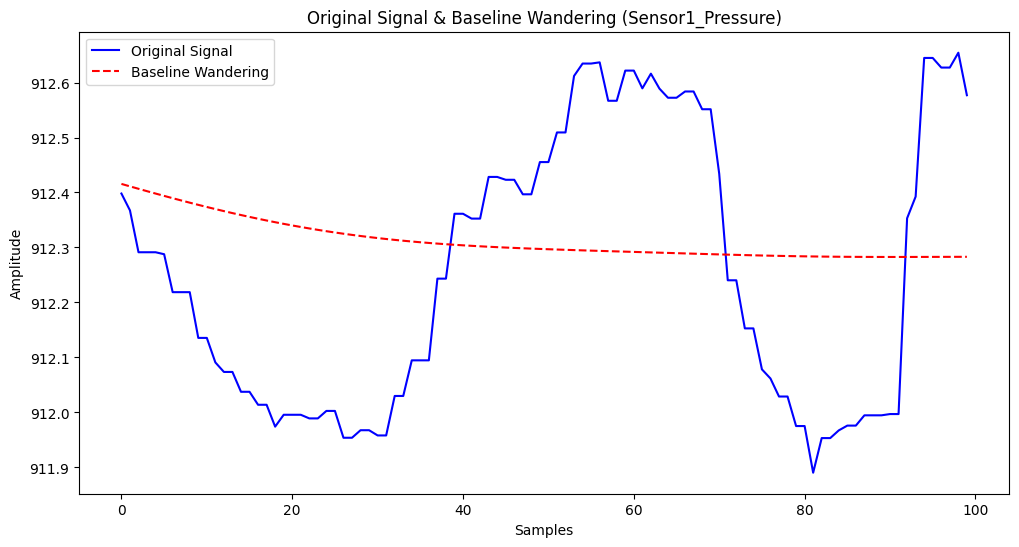

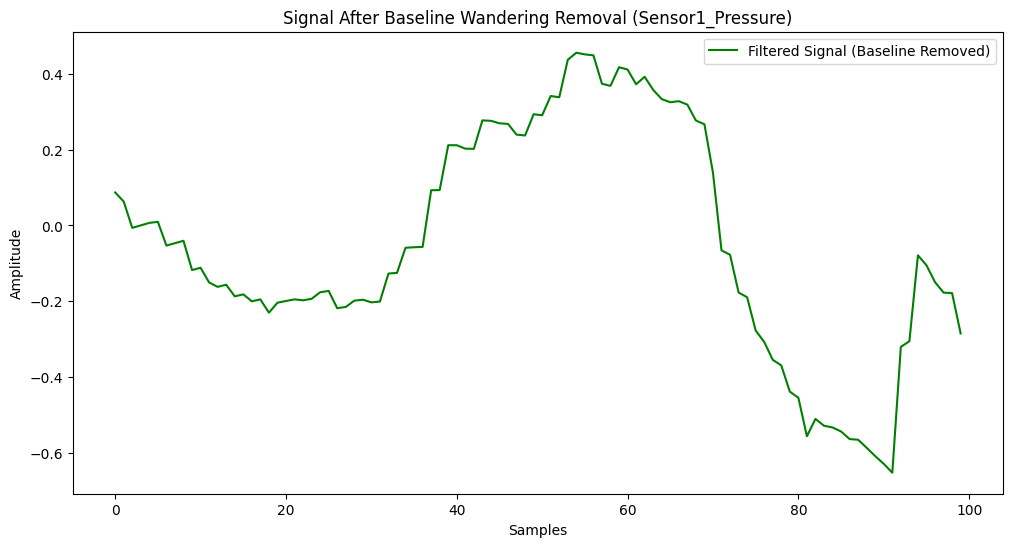

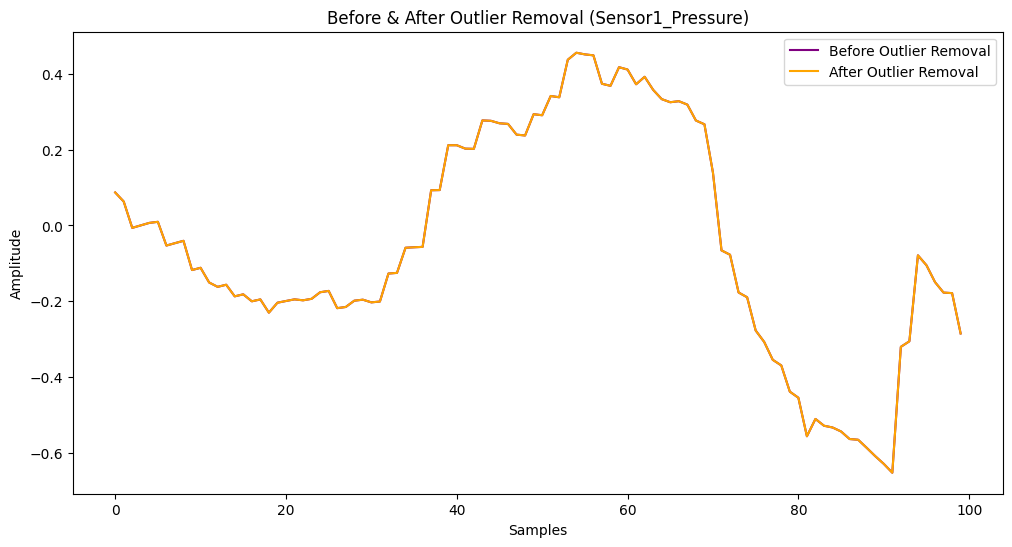

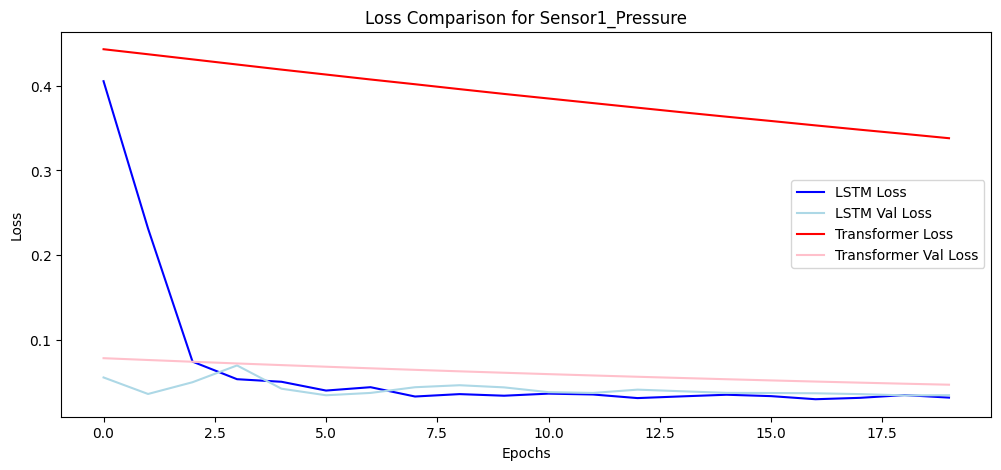

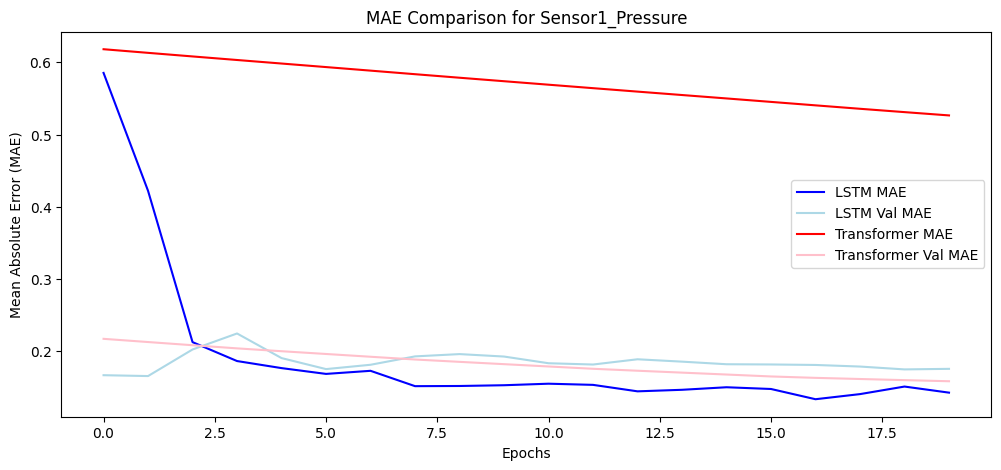

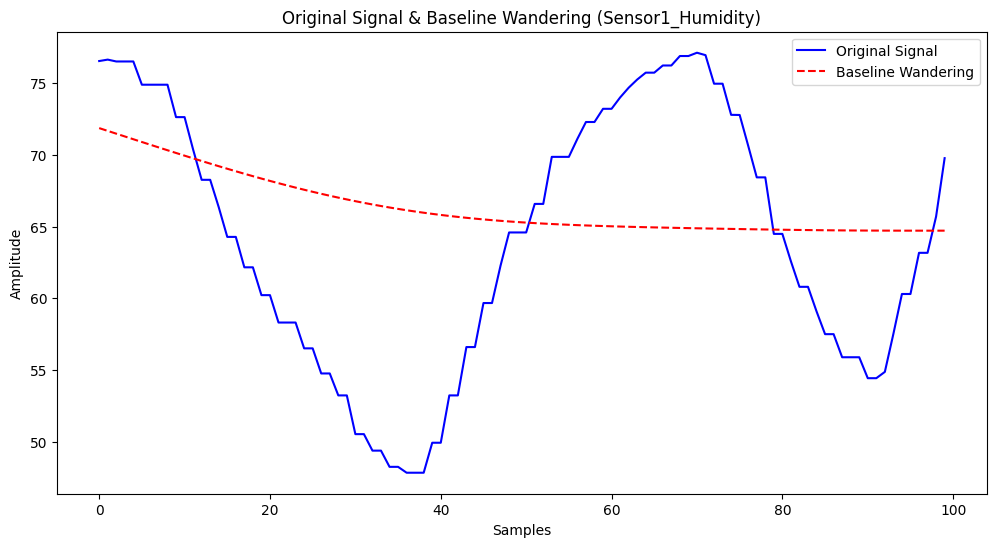

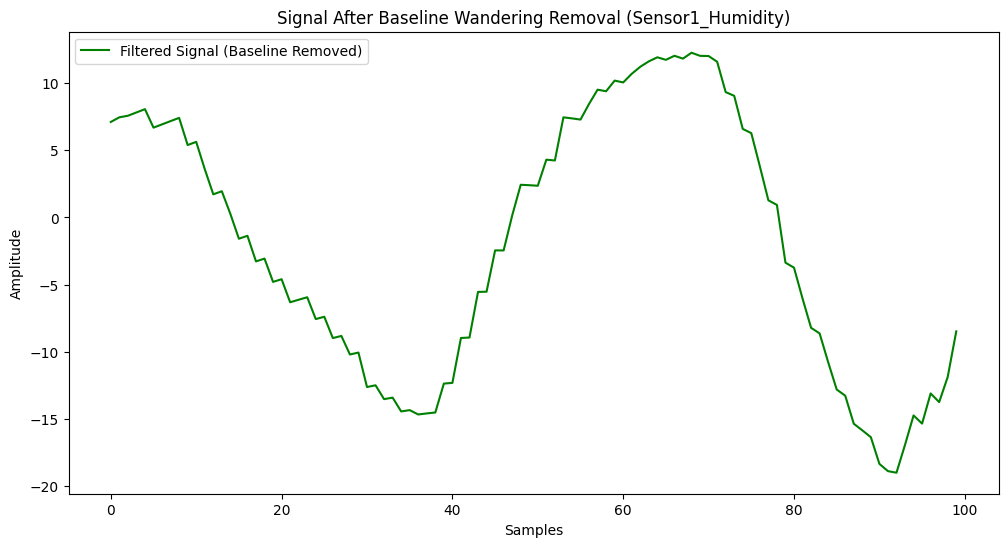

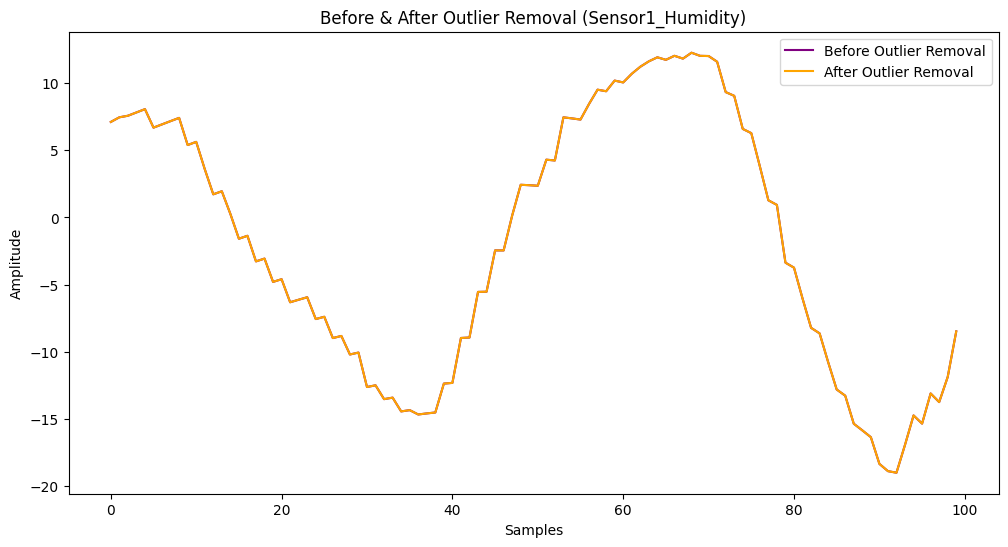

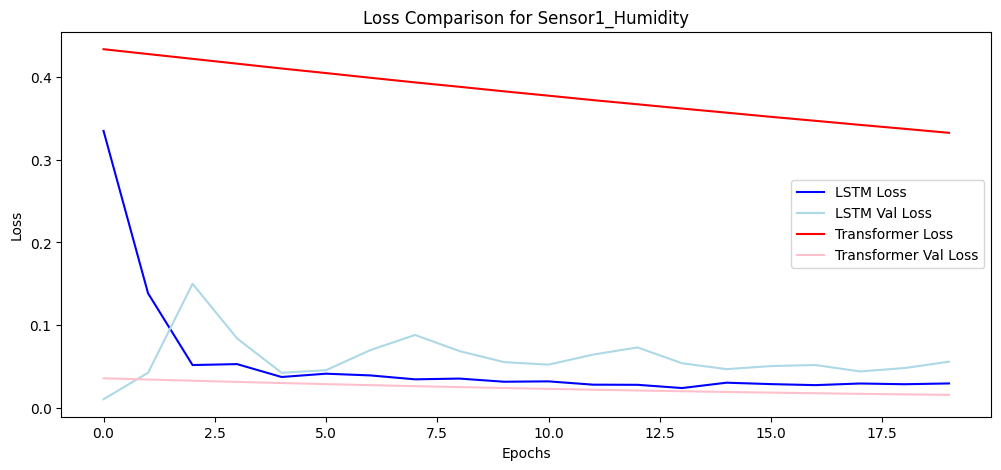

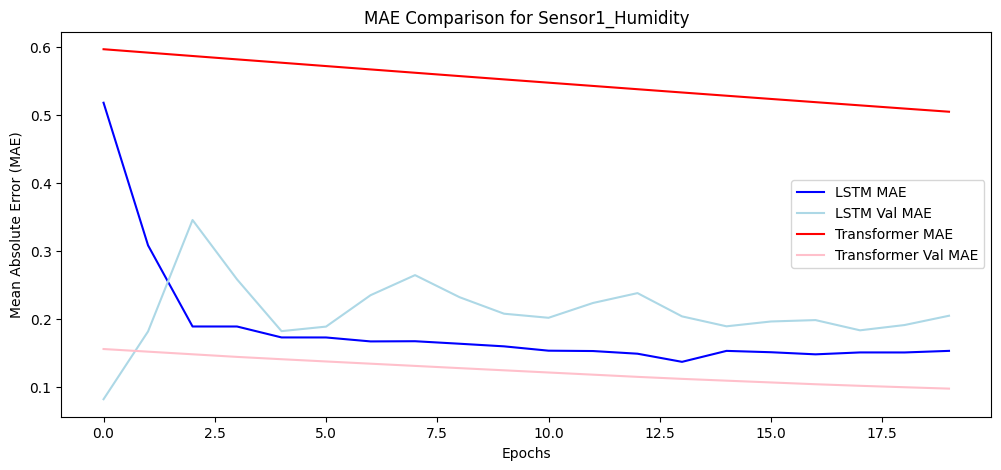

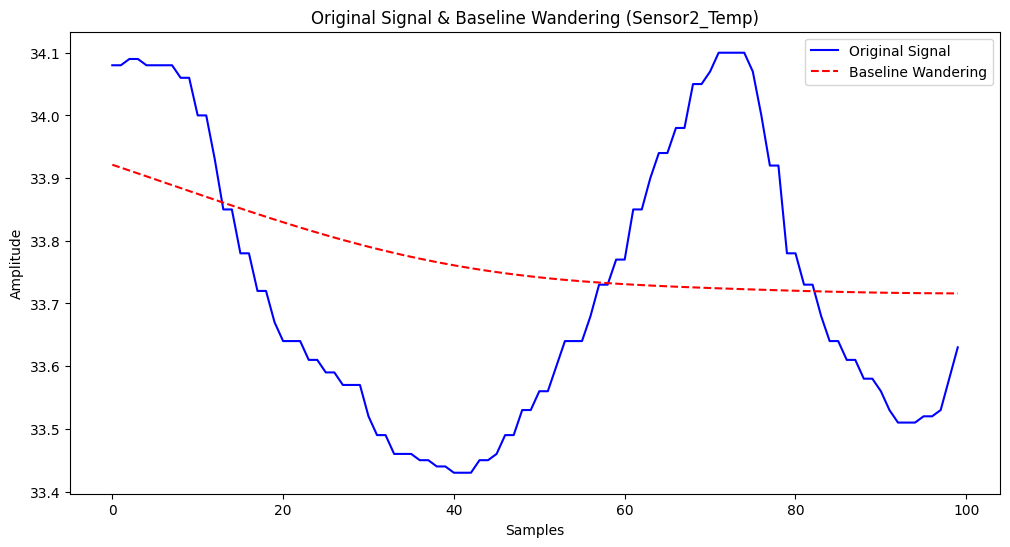

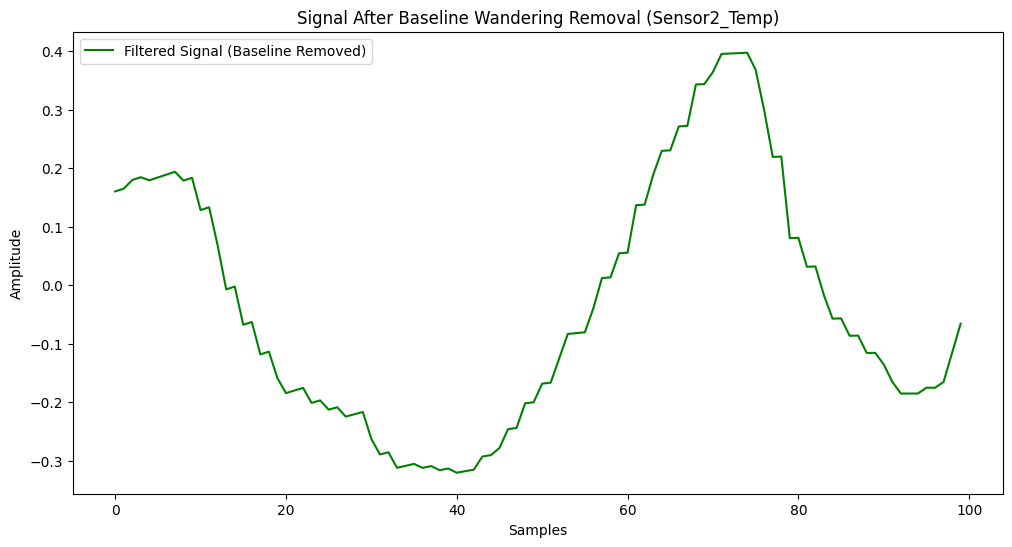

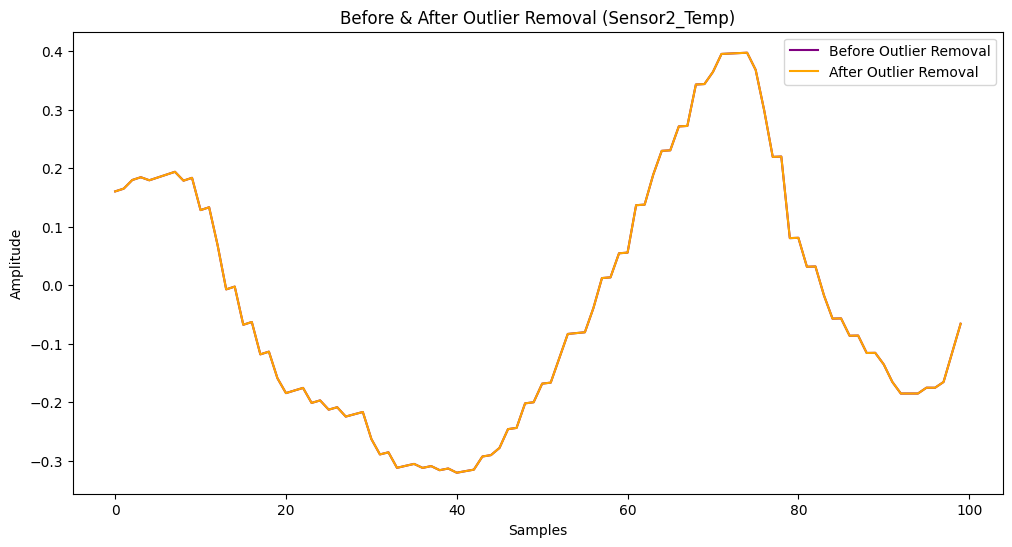

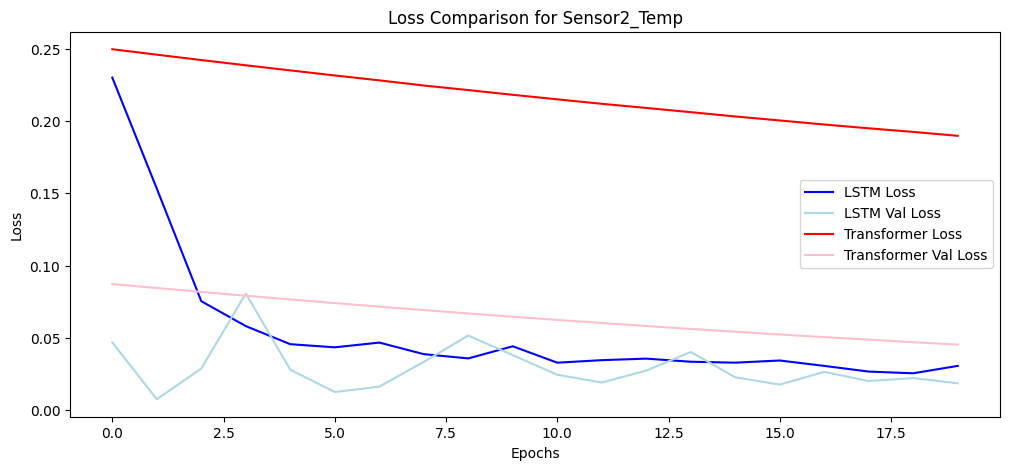

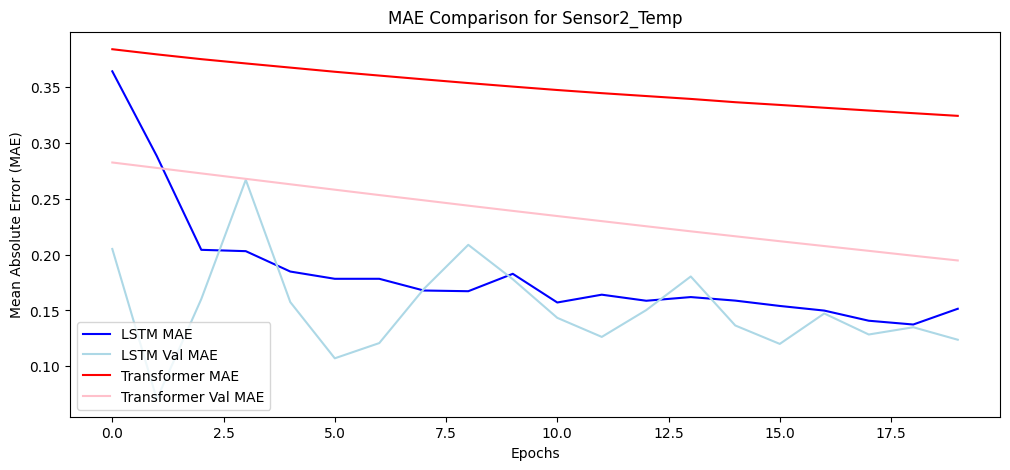

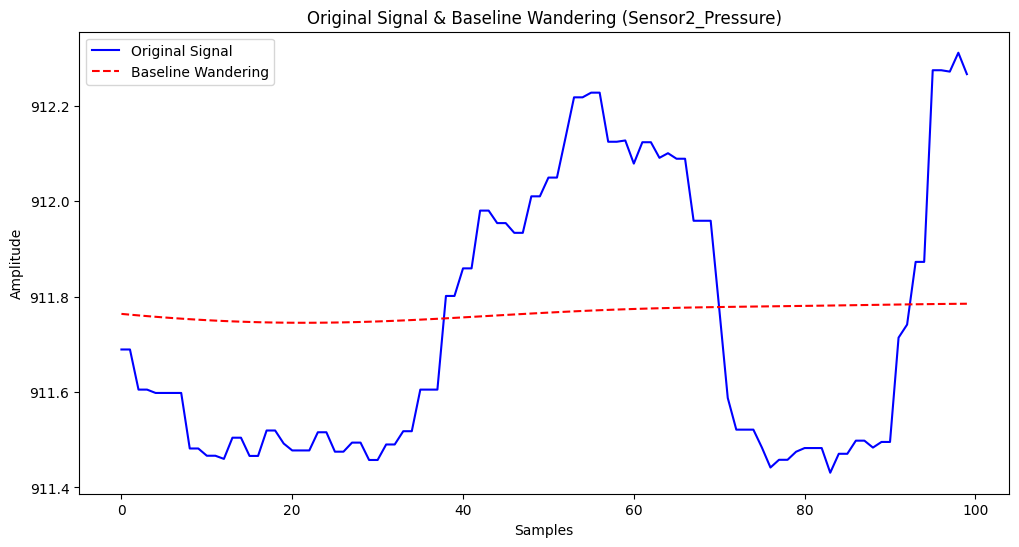

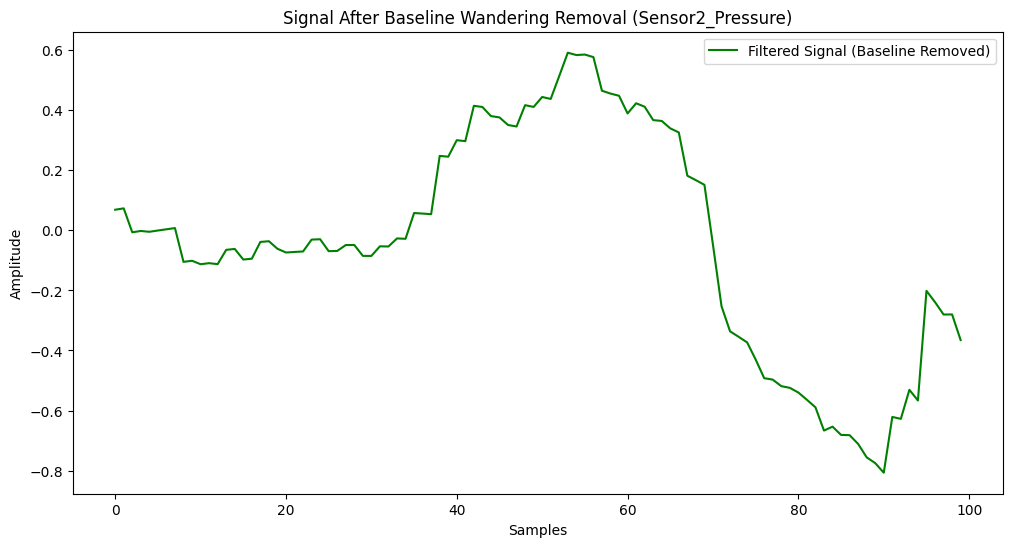

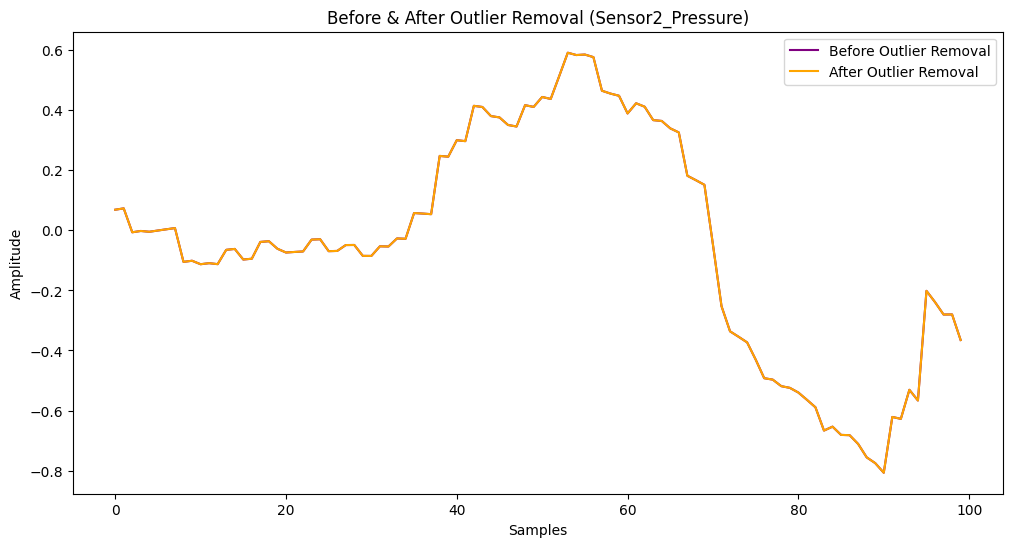

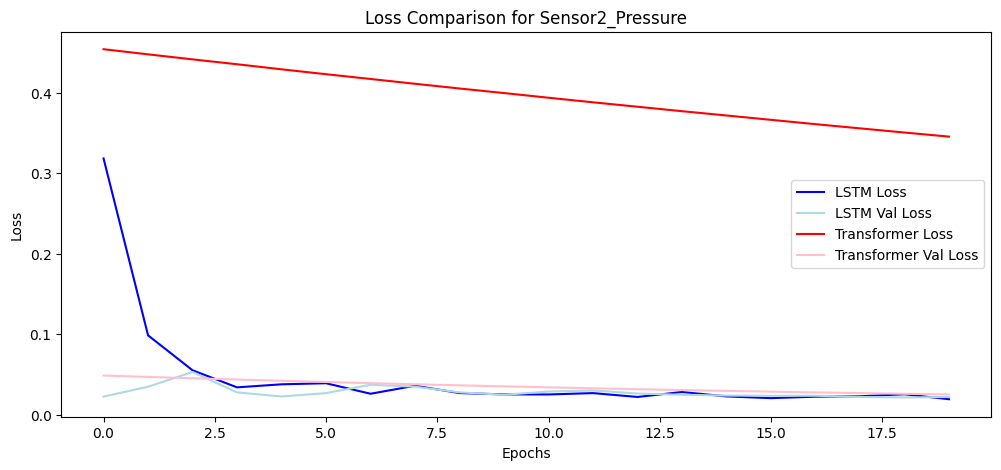

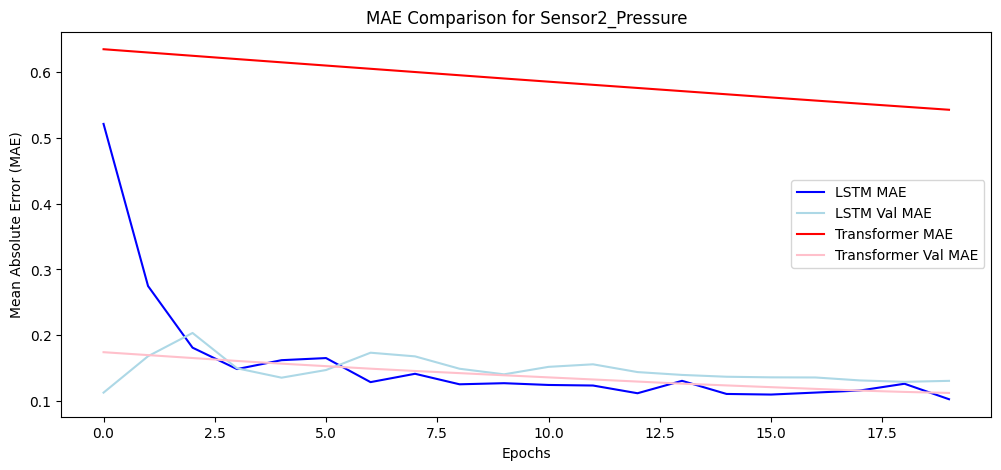

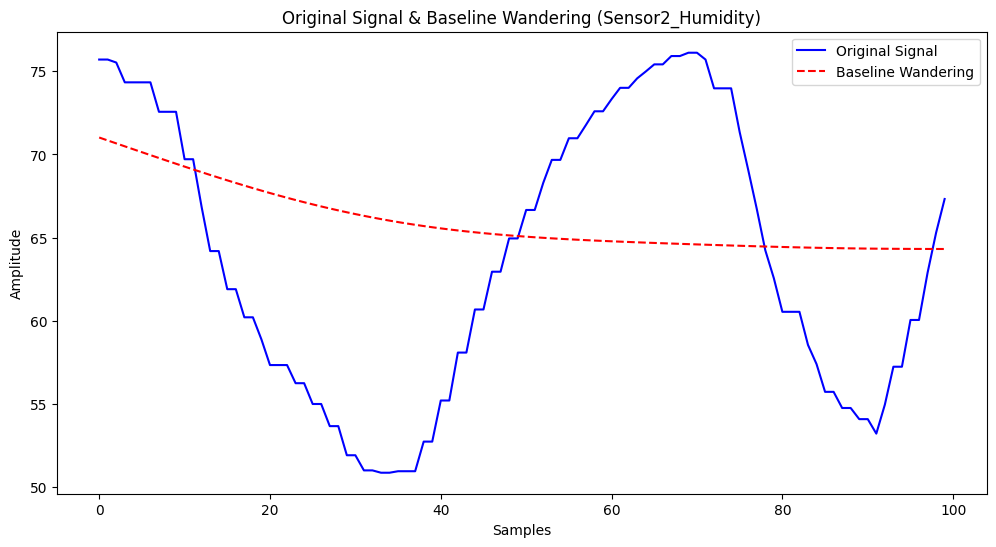

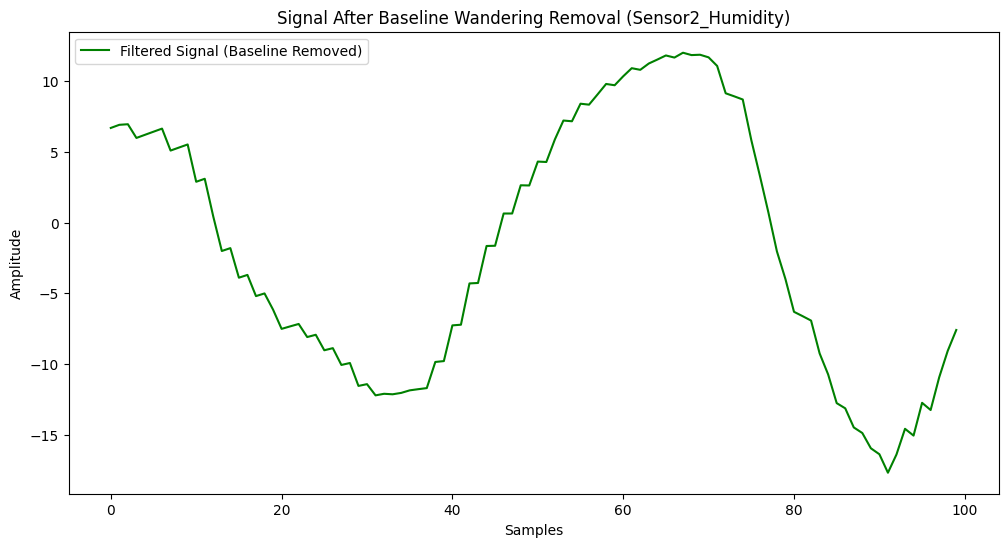

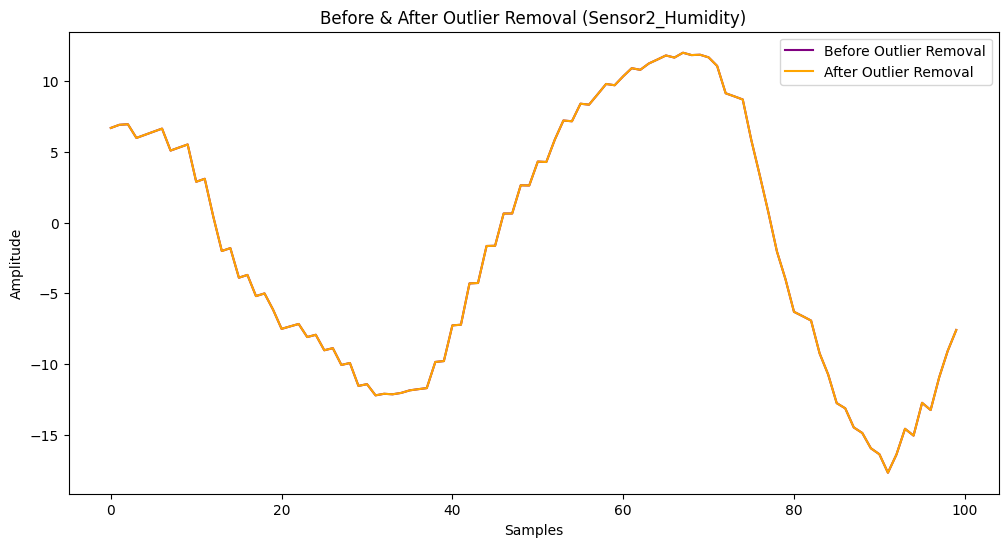

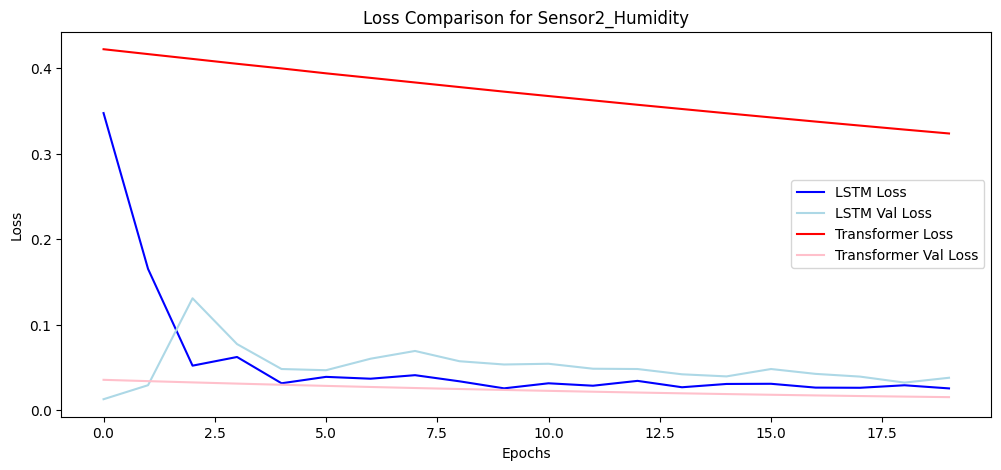

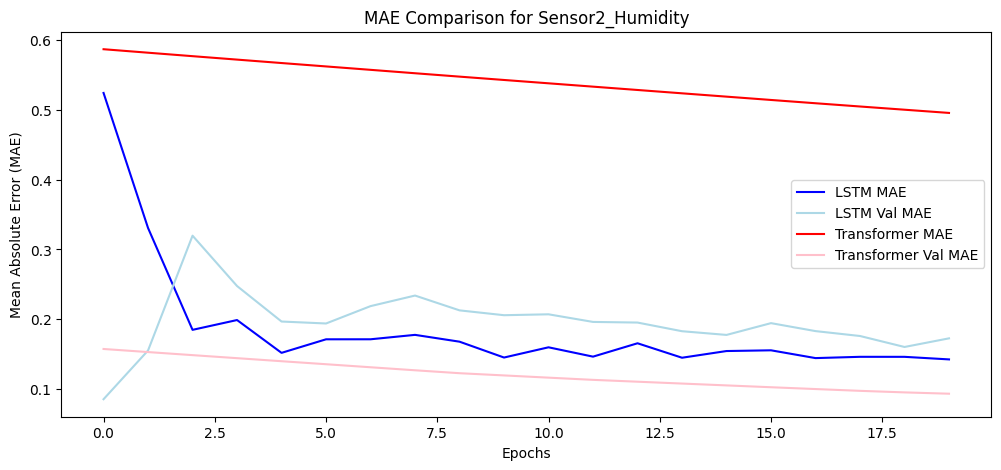

In [3]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Function to select file
def load_file():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(title="Select a dataset",
                                            filetypes=[("CSV files", "*.csv"), ("Excel files", "*.xlsx")])
    return file_path

# Butterworth High-pass Filter (Baseline Wandering Removal)
def high_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='high', analog=False)
    return filtfilt(b, a, signal)

# Butterworth Low-pass Filter (Extract Baseline Wandering)
def low_pass_filter(signal, fs=100, cutoff=0.5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Remove Outliers using Z-score Method
def remove_outliers(signal, threshold=3):
    z_scores = zscore(signal)
    return np.where(np.abs(z_scores) > threshold, np.median(signal), signal)

# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Transformer Model
def build_transformer_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = MultiHeadAttention(num_heads=4, key_dim=64)(inputs, inputs)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1)(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Load dataset
file_path = load_file()
if file_path:
    # Read the file
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    else:
        df = pd.read_excel(file_path)

    print("\n Dataset Loaded Successfully!\n")
    print(df.head())

    # Select numeric columns
    numeric_columns = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    if not numeric_columns:
        print("No numeric columns found in dataset.")
    else:
        for col in numeric_columns:
            signal = df[col].fillna(0)[:100]  # Take first 100 samples

            # Extract and remove baseline wandering
            baseline_wandering = low_pass_filter(signal)
            filtered_signal = high_pass_filter(signal)

            # Remove outliers
            outlier_removed_signal = remove_outliers(filtered_signal)

            # Normalize signal
            scaler = MinMaxScaler()
            signal_scaled = scaler.fit_transform(outlier_removed_signal.reshape(-1, 1))

            # Prepare data for LSTM/Transformer
            X, y = [], []
            time_steps = 10
            for i in range(len(signal_scaled) - time_steps):
                X.append(signal_scaled[i:i + time_steps])
                y.append(signal_scaled[i + time_steps])
            X, y = np.array(X), np.array(y)

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

            # Build and Train LSTM Model
            lstm_model = build_lstm_model((time_steps, 1))
            history_lstm = lstm_model.fit(X_train, y_train, epochs=20, batch_size=16,
                                            validation_data=(X_test, y_test), verbose=0)

            # Build and Train Transformer Model
            transformer_model = build_transformer_model((time_steps, 1))
            history_transformer = transformer_model.fit(X_train, y_train, epochs=20, batch_size=16,
                                                            validation_data=(X_test, y_test), verbose=0)

            # Plot Original Signal & Baseline Wandering
            plt.figure(figsize=(12, 6))
            plt.plot(signal, label="Original Signal", color='b')
            plt.plot(baseline_wandering, label="Baseline Wandering", color='r', linestyle='dashed')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Original Signal & Baseline Wandering ({col})")
            plt.legend()
            plt.show()

            # Plot Filtered Signal (Baseline Wandering Removed)
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Filtered Signal (Baseline Removed)", color='g')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Signal After Baseline Wandering Removal ({col})")
            plt.legend()
            plt.show()

            # Plot Before & After Outlier Removal
            plt.figure(figsize=(12, 6))
            plt.plot(filtered_signal, label="Before Outlier Removal", color='purple')
            plt.plot(outlier_removed_signal, label="After Outlier Removal", color='orange')
            plt.xlabel("Samples")
            plt.ylabel("Amplitude")
            plt.title(f"Before & After Outlier Removal ({col})")
            plt.legend()
            plt.show()

            # Plot Loss Comparison (LSTM vs Transformer)
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['loss'], label='LSTM Loss', color='blue')
            plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss', color='lightblue')
            plt.plot(history_transformer.history['loss'], label='Transformer Loss', color='red')
            plt.plot(history_transformer.history['val_loss'], label='Transformer Val Loss', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Loss")
            plt.title(f"Loss Comparison for {col}")
            plt.legend()
            plt.show()

            # Plot MAE Comparison (LSTM vs Transformer)
            plt.figure(figsize=(12, 5))
            plt.plot(history_lstm.history['mae'], label='LSTM MAE', color='blue')
            plt.plot(history_lstm.history['val_mae'], label='LSTM Val MAE', color='lightblue')
            plt.plot(history_transformer.history['mae'], label='Transformer MAE', color='red')
            plt.plot(history_transformer.history['val_mae'], label='Transformer Val MAE', color='pink')
            plt.xlabel("Epochs")
            plt.ylabel("Mean Absolute Error (MAE)")
            plt.title(f"MAE Comparison for {col}")
            plt.legend()
            plt.show()

else:
    print("No file selected. Please upload a valid dataset.")